# Making figures

This notebook is associated with:
* the manuscript "Non-parametric power-law surrogates" which currently (2021-12-14) is under review at PRX; and
* the module constrained_power_law_surogates.

This notebook is designed to produce figures in the manuscript from previously generated results.

By default, we:
* look for save results in the folder *results* (in the current directory); and
* save figures in the folder *figures* (in the current directory)

The code is provided without warranty or guarantee.

In [1]:
# Import folder names and required functions# 
from constrained_power_law_surrogates import results_folder_name, fig_folder_name, log_bin, cond_entropy
# 
# If folders results_folder_name and fig_folder_name do not exist then make them
import os
cwd = os.getcwd()
os.makedirs(cwd + '/' + results_folder_name + '/', exist_ok=True)
os.makedirs(cwd + '/' + fig_folder_name + '/', exist_ok=True)
# 
# Import packages and functions used to produce plots
# 
import numpy as np# For pointwise and pairwise array operations
import matplotlib.pyplot as plt# For plotting
from matplotlib.patches import Rectangle#Used for Fig. 11
from math import log, floor, ceil, erf#
import itertools
from scipy.special import zeta
from mpmath import gammainc #gammainc(z, a=0, b=inf) computes the (generalized) incomplete gamma function with integration limits [a, b]
import codecs, json
from matplotlib.ticker import FuncFormatter#y-axis labels in percent
# 
# 
# Define functions used to make plots
# 
def place_letter(ax, num, lett_rel_pos_x, lett_rel_pos_y, font_size):
    x_lim = ax.get_xlim()
    y_lim = ax.get_ylim()
    ax.text(x_lim[0] + lett_rel_pos_x*(x_lim[1] - x_lim[0]), y_lim[0] + lett_rel_pos_y*(y_lim[1] - y_lim[0]), ('(' + chr(ord('`') + num) + ')'), fontsize=font_size);
# 
def place_letter_log_scale(ax, num, lett_rel_pos_x, lett_rel_pos_y, font_size):
    x_lim = ax.get_xlim()
    y_lim = ax.get_ylim()
    ax.text(x_lim[0]*(x_lim[1]/x_lim[0])**lett_rel_pos_x, y_lim[0]*(y_lim[1]/y_lim[0])**lett_rel_pos_y, ('(' + chr(ord('`') + num) + ')'), fontsize=font_size);
# 
def place_letter_x_log_y_lin(ax, num, lett_rel_pos_x, lett_rel_pos_y, font_size):
    x_lim = ax_subplot.get_xlim()
    y_lim = ax_subplot.get_ylim()
    x_pos = x_lim[0]*(x_lim[1]/x_lim[0])**lett_rel_pos_x
    y_pos = y_lim[0] + lett_rel_pos_y*(y_lim[1] - y_lim[0])
    ax.text(x_pos, y_pos, ('(' + chr(ord('`') + num) + ')'), fontsize=MEDIUM_SIZE);
# 
#A function which helps us to fill legend left to right before top to bottom
#https://stackoverflow.com/questions/10101141/matplotlib-legend-add-items-across-columns-instead-of-down
def flip(items, ncol):
    return itertools.chain(*[items[i::ncol] for i in range(ncol)])
# 
def cond_ent_o_1(val_seq):
    u, val_seq = np.unique(val_seq, return_inverse=True)#This is here because cond_entropy seemed sometimes to have trouble with very large integers.
    val_seq = list(val_seq)
    return cond_entropy(val_seq[1:], val_seq[:-1])# cond_entropy(Y, X) is H(Y|X)
#
def cond_ent_o_1_b_3(val_seq, x_min):#Conditional entropy of order 1 after log-binning with base b = 3
    b = 3
    bin_edges, val_seq, low_lim_list, upp_lim_list = log_bin(val_seq, b, x_min)  
    u, val_seq = np.unique(val_seq, return_inverse=True)#This is here because cond_entropy seemed sometimes to have trouble with very large integers.
    return cond_entropy(val_seq[1:], val_seq[:-1])
# 
# 
# Choose parameters which control plot appearance
# 
SMALL_SIZE = 11
MEDIUM_SIZE = 1.25*SMALL_SIZE
BIGGER_SIZE = 1.5*SMALL_SIZE
LABEL_SIZE = MEDIUM_SIZE
# 
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels|
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
# 
plt.rcParams["font.family"] = "Times New Roman"#Use Times New Roman font
plt.rcParams["mathtext.fontset"] = "stix"
# 
line_width = 2
plt.rcParams['lines.linewidth'] = line_width
# 
surr_full_list = ['Exact', 'True', 'Observed', 'Resampled', 'Bootstrapped', 'Typical', 'Constrained', 'Shuffled', 'Markov', 'Ordinal pattern', 'AAFT', 'IAAFT']
style_dict = {'Exact': ('silver', '-'), 'True': ('silver', '-'), 'Observed':('#000000', (0, (1, 1, 2, 1))), 'Resampled':('#9467bd', '-'), 'Bootstrapped':('#e377c2', '-.'), 'Typical':('#1f77b4', '--'), 'Constrained':('#ff7f0e', ':'), 'Shuffled':('#2ca02c', '-.'), 'Markov':('#d62728', '-'), 'Ordinal pattern':('#9467bd', (0, (1, 1, 2, 1))), 'AAFT':('#ceb301', (0, (1, 1))), 'IAAFT':('#653700', (0, (3, 1, 1, 1, 1, 1)))}

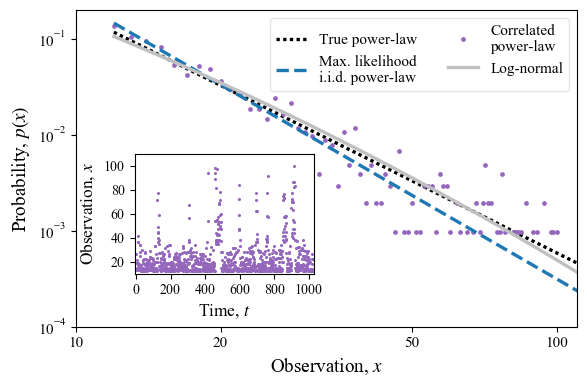

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [2]:
## Make Fig. 1
## 
# Correlations and limited observations

min_val = 12

name_str = 'power-law-log-norm-max-like'; name_str_list1 = ['Power-law', r'Log-normal']; name_str_list2 = ['Correlated power-law', r'Max. likelihood fit'];

plot_data_uncorr = np.load(results_folder_name + '/' + name_str + '_uncorr.npy').tolist()
val_seq_power_law = plot_data_uncorr[0]
val_seq_log_normal = plot_data_uncorr[1]

plot_data_empir = np.load(results_folder_name + '/' + name_str + '_empir.npy').tolist()
bin_mids = plot_data_empir[0]
emp_pdf_power_law = plot_data_empir[1]
emp_pdf_log_normal = plot_data_empir[2]

plot_data_param = np.load(results_folder_name + '/' + name_str + '_param.npy').tolist()
xx = plot_data_param[0]
yy_power_law = plot_data_param[1]
yy_log_norm = plot_data_param[2]
yy_power_law_m_l = plot_data_param[3]

plot_data_corr_2 = np.load(results_folder_name + '/' + name_str + '_correlated_2.npy').tolist()
val_seq_power_law_corr_2 = plot_data_corr_2[0]

N = len(plot_data_corr_2[0])

t_max = N
tt = [t for t in range(1, N + 1, 1)]
to_plot = range(t_max)
val_seq_power_law_corr_2_to_plot = [val_seq_power_law_corr_2[ii] for ii in to_plot]

plot_data_empir_corr_2 = np.load(results_folder_name + '/' + name_str + '_empir_corr_2.npy').tolist()
emp_pdf_power_law_corr_2 = plot_data_empir_corr_2[0]

plot_data_param_corr_2 = np.load(results_folder_name + '/' + name_str + '_param_corr_2.npy').tolist()
yy_power_law_m_l_corr_2 = plot_data_param_corr_2[0]

fig_1_colour_list = ['k', 'silver', '#2ca02c', '#1f77b4', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
fig_1_line_styles = [(0, (1, 1)), '-', ':', '--']
marker_size_fig_1 = 3
line_width_fig_1 = 1.2

plt.rcParams["font.family"] = "Times New Roman"#Use Times New Roman font
plt.rcParams["mathtext.fontset"] = "stix"

fig, ax = plt.subplots(1, 1, figsize=(6, 4)); left, bottom, width, height = [0.24, 0.30, 0.30, 0.30]
left, bottom, width, height = [0.235, 0.30, 0.30, 0.30]

ax_subplot = ax

#Legend
ax_subplot.plot([0], [0], color=fig_1_colour_list[0], linestyle=fig_1_line_styles[0], linewidth=2*line_width_fig_1)
ax_subplot.plot([0], [0], color=fig_1_colour_list[3], linestyle=fig_1_line_styles[3], linewidth=2*line_width_fig_1)
ax_subplot.plot([0], [0], color=fig_1_colour_list[4], linestyle='None', marker='o', markersize=0.8*marker_size_fig_1, linewidth=1.5*line_width_fig_1)
ax_subplot.plot([0], [0], color=fig_1_colour_list[1], linestyle=fig_1_line_styles[1], linewidth=2*line_width_fig_1)

ax_subplot.plot(xx, yy_power_law, color=fig_1_colour_list[0], linestyle=fig_1_line_styles[0], linewidth=2*line_width_fig_1)
ax_subplot.plot(bin_mids, plot_data_empir_corr_2[0], marker='o', markersize=0.8*marker_size_fig_1, color=fig_1_colour_list[4], linestyle='None', linewidth=2*line_width_fig_1)
ax_subplot.plot(xx, yy_power_law_m_l_corr_2, color=fig_1_colour_list[3], linestyle=fig_1_line_styles[3], linewidth=2*line_width_fig_1)
ax_subplot.plot(xx, yy_log_norm, color=fig_1_colour_list[1], linestyle=fig_1_line_styles[1], linewidth=2*line_width_fig_1)

leg = ax_subplot.legend([r'True power-law', r'Max. likelihood' + '\n' + 'i.i.d. power-law', r'Correlated' + '\n' + 'power-law', 'Log-normal'], ncol=2, loc = 'upper right', bbox_to_anchor=(1, 1, 0, 0));
leg.ncol=2
frame = leg.get_frame()
frame.set_alpha(0.5)
ax_subplot.set_xscale('log')
ax_subplot.set_yscale('log')
ax_subplot.set_xlabel(r'Observation, $x$')
ax_subplot.set_ylabel('Probability, $p(x)$')
x_ticks  = [10, 20, 50, 100, 200]
ax_subplot.set_xticks(x_ticks)
ax_subplot.set_xticklabels([str(x_t) for x_t in x_ticks])
ax_subplot.set_xlim(10, max(val_seq_power_law_corr_2_to_plot) + 10)
ax_subplot.set_ylim(10**-4, 0.2)
fig.tight_layout()
ax_subplot.minorticks_off()

INSET_SMALL_SIZE = 10
INSET_MEDIUM_SIZE = 1.25*INSET_SMALL_SIZE
INSET_BIGGER_SIZE = 1.5*INSET_SMALL_SIZE
INSET_LABEL_SIZE = INSET_MEDIUM_SIZE

ax2 = fig.add_axes([left, bottom, width, height])

ax2.fontsize=INSET_MEDIUM_SIZE          # controls default text sizes
ax2.titlesize=INSET_MEDIUM_SIZE     # fontsize of the axes title
ax2.labelsize=INSET_MEDIUM_SIZE    # fontsize of the x and y labels
ax2.tick_params(labelsize=INSET_SMALL_SIZE)

ax_subplot = ax2

tt_to_plot = [tt[ii] for ii in to_plot]

ax_subplot.plot(tt_to_plot, val_seq_power_law_corr_2_to_plot, color=fig_1_colour_list[4], linestyle='None', marker='o', markersize=0.4*marker_size_fig_1, linewidth=1.5*line_width_fig_1)

max_val = max(val_seq_power_law_corr_2_to_plot)

ax_subplot.set_xlabel(r'Time, $t$', size=INSET_MEDIUM_SIZE)
ax_subplot.set_ylabel('Observation, $x$', size=INSET_MEDIUM_SIZE)
ax_subplot.minorticks_off()

y_ticks = [0, 20, 40, 60, 80, 100, 120]
ax_subplot.set_yticks(y_ticks)
ax_subplot.set_yticklabels([str(y_t) for y_t in y_ticks])
ax_subplot.set_ylim([10, max(val_seq_power_law_corr_2_to_plot) + 10])
x_ticks = [t for t in range(0, N, 200)]
ax_subplot.set_xticks(x_ticks)
ax_subplot.set_xticklabels([str(x_t) for x_t in x_ticks])
ax_subplot.set_xlim([-10, t_max + 10])

ax_subplot.patch.set_alpha(0.5)# Add some opacity to background of inset (to make sure no points are covered)

plt.show()

name_str = name_str + '-one-panel'

fig.savefig(fig_folder_name + '/' + name_str + '.png', bbox_inches='tight')
fig.savefig(fig_folder_name + '/' + name_str + '.eps', bbox_inches='tight')
fig.savefig(fig_folder_name + '/' + name_str + '.pdf', bbox_inches='tight')

In [3]:
## Figures 2,3 are schematics

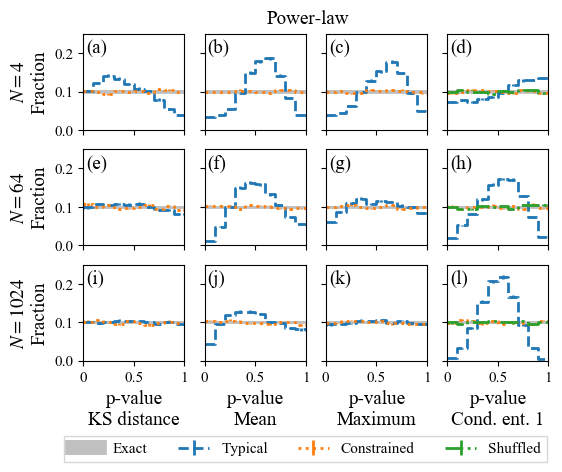

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [4]:
## Make Fig. 4
## 
#P-values:

min_deg = 1
min_N = 4; max_N = 1024; num_N = 1 + int(np.round(log(max_N/min_N, 2))); NN = [2**n for n in range(int(np.round(log(min_N, 2))), int(np.round(log(max_N, 2))) + 1, 1)]

ind_N_list = [0, 4, 8]
N_list = [NN[ind_N] for ind_N in ind_N_list]


stat_list = ['ks_dist', 'mean_de', 'max_deg', 'con_e_1']
stat_name_list = ['KS distance', 'Mean', 'Maximum', 'Cond. ent. 1']
surr_list = ['exact', 'typic', 'const', 'shuff']
surr_name_list = ['Exact', 'Typical', 'Constrained', 'Shuffled']
rej_type = 'siz'
rej_type_name = 'Size'
distrib = 'disc_zeta'
num_tests = 10000
num_surr = 9

n_stats = len(stat_name_list)

name_part_1 = '1gamma-2-5-2-5-2-5_x_min-'
name_part_2 = '_' + str(num_N) + 'N-' + str(min_N) + '-' + str(max_N) + '_stat-'
name_part_3 = '_surr-'
name_part_4 = '_rej-' + rej_type + '_'
name_part_5 = '_nom_size-0-1_' + str(num_surr) + 'surr_' + str(num_tests) + 'tests_safe-1_dir_p_vals_test.npy'


name_str = 'p-vals_power-law_' + str(len(stat_list)) + 'stats' + '_nom-size-0-1_num-surr-9_num-tests_' + str(num_tests) + '_' + rej_type + '_min-val-' + str(min_deg) + '_' + str(len(surr_list)) + 'surr_' + str(len(N_list)) + 'N' + str(N_list[0]) + '-' + str(N_list[-1])
x_min_list = [1, 12]

fig, ax = plt.subplots(len(ind_N_list), n_stats, sharex='col', sharey='row', figsize=(6, 6))

num_bins = int(np.round((num_surr + 1)))
bins = np.linspace(0, 1, num_bins + 1)
bins_mid = np.linspace(0.5/num_bins, 1 - 0.5/num_bins, num_bins)
xx = np.concatenate(([0], bins_mid, [1]))

lett_rel_pos_x = 0.03;
lett_rel_pos_y = 0.8;

for kk in range(len(ind_N_list)):
    ind_N = ind_N_list[kk]
    N = NN[ind_N]
    for mm in range(n_stats):
        ax_subplot = ax[kk][mm]
        for jj in [mm]:
            stat = stat_list[jj]
            for ii in range(len(surr_list)):
                surr_name = surr_name_list[ii]
                style = style_dict[surr_name]
                if (ii == 0):
                    surr = surr_list[ii]
                    yy = np.linspace(0.5/(num_surr + 1), (num_surr + 0.5)/(num_surr + 1), num_surr + 1)
                    counts, bins = np.histogram(yy, bins)
                    yy = counts/np.sum(counts)
                    yy = np.concatenate(([yy[0]], yy, [yy[-1]]))
                    yy_err = np.sqrt(yy*(1-yy)/num_tests)
                    l_ii = ax_subplot.errorbar(xx, yy, yy_err, linestyle=style[1], color=style[0], elinewidth=30, capsize=0, drawstyle = 'steps-mid')
                else:
                    if ((not (ii == 3)) or (mm == 3)):
                        surr = surr_list[ii]
                        file_name_str = name_part_1 + str(min_deg) + name_part_2 + stat + name_part_3 + surr + name_part_4 + distrib + name_part_5
                        zz = np.load(results_folder_name + '/' + file_name_str)
                        yy = zz[0, ind_N, :]
                        counts, bins = np.histogram(yy, bins)
                        yy = counts/np.sum(counts)
                        yy = np.concatenate(([yy[0]], yy, [yy[-1]]))
                        yy_err = np.sqrt(yy*(1-yy)/num_tests)
                        yy_err = np.sqrt(yy*(1-yy)/num_tests)
                        l_ii = ax_subplot.errorbar(xx, yy, yy_err, linestyle=style[1], color=style[0], drawstyle = 'steps-mid')
            ax_subplot.set_ylim(0, 0.25)
        ax_subplot.set_xlim(0, 1)
        x_tick_list = [0, 0.5, 1]
        ax_subplot.set_xticks(x_tick_list)
        num = kk*n_stats + mm + 1
        place_letter(ax_subplot, num, lett_rel_pos_x, lett_rel_pos_y, MEDIUM_SIZE)
    ax_subplot = ax[kk][0]
    ax_subplot.set_yticks([0, 0.1, 0.2])
    ax_subplot.yaxis.set_label_text(r'$N = ' + str(N_list[kk]) + '$' + '\n' + 'Fraction')

for jj in range(n_stats):
    ax[kk][jj].set_xticklabels([str(x_t) for x_t in x_tick_list])
    ax[kk][jj].xaxis.set_label_text(r'p-value' + '\n' + stat_name_list[jj])

fig.suptitle(r'Power-law', fontsize=MEDIUM_SIZE,y=0.92)
fig.subplots_adjust(bottom=0, wspace=0.2)
ax[len(ind_N_list) - 1][3].legend(labels=surr_name_list, loc='upper center', bbox_to_anchor=(-1.4, -0.7), fancybox=False, shadow=False, ncol=4)
plt.subplots_adjust(bottom=0.335)

plt.show()
fig.savefig(fig_folder_name + '/' + name_str + '.eps', bbox_inches='tight')
fig.savefig(fig_folder_name + '/' + name_str + '.png', bbox_inches='tight')
fig.savefig(fig_folder_name + '/' + name_str + '.pdf', bbox_inches='tight')

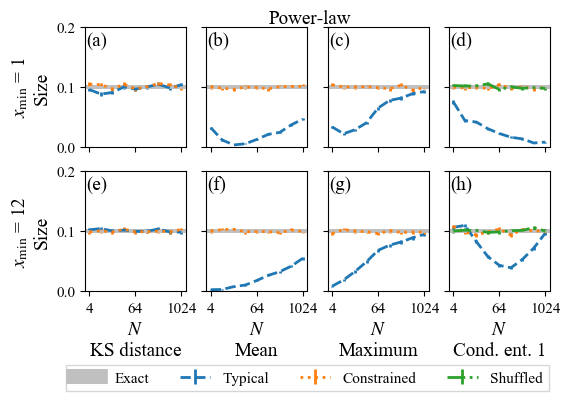

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [5]:
## Make Fig. 5
## 
#Size:

min_deg_list = [1, 12]
min_N = 4; max_N = 1024; num_N = 1 + int(np.round(log(max_N/min_N, 2))); NN = [2**n for n in range(int(np.round(log(min_N, 2))), int(np.round(log(max_N, 2))) + 1, 1)]

stat_list = ['ks_dist', 'mean_de', 'max_deg', 'con_e_1']
stat_name_list = ['KS distance', 'Mean', 'Maximum', 'Cond. ent. 1']
surr_list = ['exact', 'typic', 'const', 'shuff']
surr_name_list = ['Exact', 'Typical', 'Constrained', 'Shuffled']
rej_type = 'siz'
rej_type_name = 'Size'
distrib_list = ['disc_zeta', 'disc_zeta']
distrib_name = 'power-law'
num_tests = 10000

n_stats = len(stat_name_list)

name_part_1 = '1gamma-2-5-2-5-2-5_x_min-'
name_part_2 = '_' + str(num_N) + 'N-' + str(min_N) + '-' + str(max_N) + '_stat-'
name_part_3 = '_surr-'
name_part_4 = '_rej-' + rej_type + '_'
name_part_5 = '_nom_size-0-1_9surr_' + str(num_tests) + 'tests_safe-1_dir_rej_rates_test.dat'


name_str = distrib_name.replace(' ', '-').replace(',', '') + '_' + str(len(stat_list)) + 'stats' + '_nom-size-0-1_num-surr-9_num-tests_' + str(num_tests) + '_' + rej_type + '_min-deg-' + str(min_deg_list[0]) + '-' + str(min_deg_list[1]) + '_' + str(len(surr_list)) + 'surr_' + str(num_N) + 'N' + str(min_N) + '-' + str(max_N)
x_min_list = [1, 12]

fig, ax = plt.subplots(2, n_stats, sharex='col', sharey='row', figsize=(6, 3))

lett_rel_pos_x = 0.0002;
lett_rel_pos_y = 0.85;

l_list = []
for kk in range(len(min_deg_list)):
    min_deg = min_deg_list[kk]
    distrib = distrib_list[kk]
    for mm in range(n_stats):
        ax_subplot = ax[kk][mm]
        for jj in [mm]:
            stat = stat_list[jj]
            for ii in range(len(surr_list)):
                surr_name = surr_name_list[ii]
                style = style_dict[surr_name]
                if (ii == 0):
                    yy = np.array([0.1]*len(NN))
                    yy_err = np.sqrt(yy*(1-yy)/num_tests)
                    l_ii = ax_subplot.errorbar(NN, yy, yy_err, linestyle=style[1], color=style[0], elinewidth=30, capsize=0)
                    if (mm == n_stats - 1):
                        l_list = l_list + [l_ii]
                else:
                    if ((not (ii == 3)) or (mm >= 3)):
                        surr = surr_list[ii]
                        file_name_str = name_part_1 + str(min_deg) + name_part_2 + stat + name_part_3 + surr + name_part_4 + distrib + name_part_5
                        zz = np.loadtxt(results_folder_name + '/' + file_name_str)
                        yy = zz[:]
                        yy_err = np.sqrt(yy*(1-yy)/num_tests)
                        l_ii = ax_subplot.errorbar(NN, yy, yy_err, linestyle=style[1], color=style[0])
                        if (mm == n_stats - 1):
                            l_list = l_list + [l_ii]
        ax_subplot.set_ylim(0, 0.2)
        ax_subplot.set_xscale('log')
        ax_subplot.set_xticks([4, 64, 1024])
        ax_subplot.set_yticks([0, 0.1, 0.2])
        if (kk == 1):
            ax_subplot.xaxis.set_label_text('N')
            ax_subplot.set_xticklabels([str(4), str(64), str(1024)])
        else:
            ax_subplot.set_xticklabels(['','',''])
        num = kk*n_stats + mm + 1
        place_letter(ax_subplot, num, lett_rel_pos_x, lett_rel_pos_y, MEDIUM_SIZE)
    ax_subplot = ax[kk][0]
    ax_subplot.yaxis.set_label_text(r'$x_{\rm{min}}$ = ' + str(x_min_list[kk]) + '\n' + rej_type_name)

for jj in range(n_stats):
    ax[len(min_deg_list) - 1][jj].xaxis.set_label_text(r'$N$' + '\n' + stat_name_list[jj])

fig.suptitle(r'Power-law', fontsize=MEDIUM_SIZE, y=0.94)

fig.subplots_adjust(bottom=0, wspace=0.2)
ax[len(min_deg_list) - 1][1].legend(handles = l_list, labels=surr_name_list, loc='upper center', bbox_to_anchor=(1, -0.55), fancybox=False, shadow=False, ncol=5)

plt.show()
fig.savefig(fig_folder_name + '/' + name_str + '.eps', bbox_inches='tight')
fig.savefig(fig_folder_name + '/' + name_str + '.png', bbox_inches='tight')
fig.savefig(fig_folder_name + '/' + name_str + '.pdf', bbox_inches='tight')

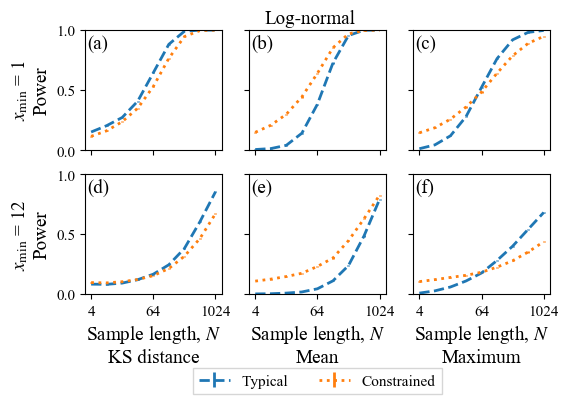

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [6]:
## Make Fig. 6
## 
#Power:

min_deg_list = [1, 12]
min_N = 4; max_N = 1024; num_N = 1 + int(np.round(log(max_N/min_N, 2))); NN = [2**n for n in range(int(np.round(log(min_N, 2))), int(np.round(log(max_N, 2))) + 1, 1)]

stat_list = ['ks_dist', 'mean_de', 'max_deg']
stat_name_list = ['KS distance', 'Mean', 'Maximum']
surr_list = ['typic', 'const']
surr_name_list = ['Typical', 'Constrained']
rej_type = 'pow'
rej_type_name = 'Power'
distrib_list = ['l_n_c_dir', 'l_n_c_dir']
distrib_name = 'log-normal'
num_tests = 10000

n_stats = len(stat_list)

name_part_1 = '1gamma-1-5-1-5-1-5_x_min-'
name_part_2 = '_' + str(num_N) + 'N-' + str(min_N) + '-' + str(max_N) + '_stat-'
name_part_3 = '_surr-'
name_part_4 = '_rej-' + rej_type + '_'
name_part_5 = '_nom_size-0-1_9surr_' + str(num_tests) + 'tests_safe-1_dir_rej_rates_test.dat'

name_str = distrib_name.replace(' ', '-').replace(',', '') + '_' + str(len(stat_list)) + 'stats' + '_nom-size-0-1_num-surr-9_num-tests_' + str(num_tests) + '_' + rej_type + '_min-deg-' + str(min_deg_list[0]) + '-' + str(min_deg_list[1]) + '_' + str(len(surr_list)) + 'surr_' + str(num_N) + 'N' + str(min_N) + '-' + str(max_N)
x_min_list = [1, 12]

fig, ax = plt.subplots(2, n_stats, sharex='col', sharey='row', figsize=(6, 3))

lett_rel_pos_x = 0.0002;
lett_rel_pos_y = 0.85;

l_list = []
for kk in range(len(min_deg_list)):
    min_deg = min_deg_list[kk]
    distrib = distrib_list[kk]
    for mm in range(n_stats):
        ax_subplot = ax[kk][mm]
        for jj in [mm]:
            stat = stat_list[jj]
            for ii in range(len(surr_list)):
                surr_name = surr_name_list[ii]
                style = style_dict[surr_name]
                surr = surr_list[ii]
                file_name_str = name_part_1 + str(min_deg) + name_part_2 + stat + name_part_3 + surr + name_part_4 + distrib + name_part_5
                zz = np.loadtxt(results_folder_name + '/' + file_name_str)
                yy = zz
                yy_err = np.sqrt(yy*(1-yy)/num_tests)
                l_ii = ax_subplot.errorbar(NN, yy, yy_err, linestyle=style[1], color=style[0])
                l_list = l_list + [l_ii]
        ax_subplot.set_xscale('log')
        ax_subplot.set_xticks([4, 64, 1024])
        if (kk == 1):
            ax_subplot.xaxis.set_label_text('N')
            ax_subplot.set_xticklabels([str(4), str(64), str(1024)])
        else:
            ax_subplot.set_xticklabels(['','',''])
        ax_subplot.set_ylim(0, 1)
        ax_subplot.set_yticks([0, 0.5, 1])
        num = kk*n_stats + mm + 1
        place_letter(ax_subplot, num, lett_rel_pos_x, lett_rel_pos_y, MEDIUM_SIZE)
    ax_subplot = ax[kk][0]
    ax_subplot.yaxis.set_label_text(r'$x_{\rm{min}}$ = ' + str(x_min_list[kk]) + '\n' + rej_type_name)

for jj in range(n_stats):
    ax[len(min_deg_list) - 1][jj].xaxis.set_label_text(r'Sample length, $N$' + '\n' + stat_name_list[jj])

fig.suptitle(r'Log-normal', fontsize=MEDIUM_SIZE, y=0.95)

fig.subplots_adjust(bottom=0, wspace=0.2)
ax[len(min_deg_list) - 1][1].legend(handles = l_list, labels=surr_name_list, loc='upper center', bbox_to_anchor=(0.5, -0.55), fancybox=False, shadow=False, ncol=3)

plt.show()
fig.savefig(fig_folder_name + '/' + name_str + '.eps', bbox_inches='tight')
fig.savefig(fig_folder_name + '/' + name_str + '.png', bbox_inches='tight')
fig.savefig(fig_folder_name + '/' + name_str + '.pdf', bbox_inches='tight')

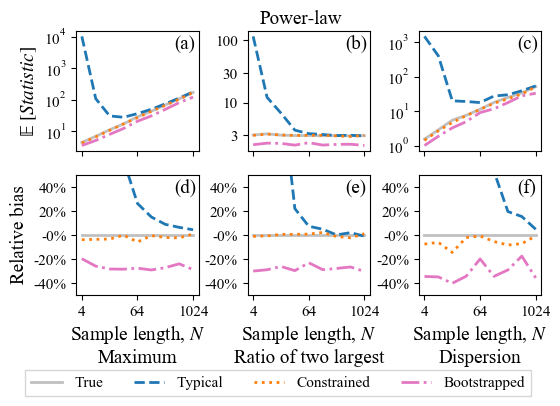

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [7]:
# Make Fig. 7
#
import numpy.matlib

to_plot = [0, 1, 2, 4]
num_to_plot = len(to_plot)

surr_name_list = ['True', 'Typical', 'Constrained', 'Observed', 'Bootstrapped']

num_tests = 10000;

stat_name_str_list = ['max_deg', 'r1_r2_rat', 'vmr']
stat_label_str_list = ['Maximum', 'Ratio of two largest', 'Dispersion']
yy_tick_list_list_list = [[[10**n for n in range(-20, 20)], [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000], [10**n for n in range(-10, 10)]],\
                          [np.arange(-10, 10, 0.2), np.arange(-10, 10, 0.2), np.arange(-10, 10, 0.2)]]

num_stat = len(stat_name_str_list)
x_min = 1

num_surr = 100

this_gamma = 2.5; gamma_str = str(this_gamma).replace('.', '-')

file_name_str_parts =['stat-vals-' + str(num_tests) + '-tests-1gamma-' + gamma_str + '-' + gamma_str + '_x_min-' + str(x_min) + '_9N-4-1024_stat-', '_surr-type-', '_true-func-0_', 'surr_eff_rej_rates_test.npy']

to_plot_str = str(to_plot[0])
for ii in range(1, num_to_plot):
    to_plot_str = to_plot_str + '-' + str(to_plot[ii])

name_str = 'expectation-bias_' + 'power-law_min-val-1_' + str(num_tests) + 'tests_' + str(num_surr) + 'surr_' + to_plot_str;

max_power_2_p_1 = 11;

NN = [2**n for n in range(2, max_power_2_p_1, 1)]

n_cols = len(stat_name_str_list);
n_rows = 2

fig, ax = plt.subplots(n_rows, n_cols, sharex='col', sharey='none', figsize=(6, 3))

lett_rel_pos_x = 0.80;
lett_rel_pos_y = 0.85;

l_list = []
for kk in range(n_rows):
    for jj in range(n_cols):
        ax_subplot = ax[kk][jj]
        stat_name_str = stat_name_str_list[jj]
        file_name_str = file_name_str_parts[0] + stat_name_str + file_name_str_parts[1] + str(0) + file_name_str_parts[2] + str(num_surr) + file_name_str_parts[3]
        for ii in range(num_to_plot):
            surr_code = to_plot[ii]
            surr_name = surr_name_list[surr_code]
            style = style_dict[surr_name]
            file_name_str = file_name_str_parts[0] + stat_name_str + file_name_str_parts[1] + str(surr_code) + file_name_str_parts[2] + str(num_surr) + file_name_str_parts[3]
            zz = np.load(results_folder_name + '/' + 'mean_' + file_name_str)
            yy = zz[0]
            yy = np.mean(yy, axis=1)
            if (kk == 0):
                l_ii = ax_subplot.errorbar(NN, yy, linestyle=style[1], color=style[0])
                ax_subplot.set_yscale('log')
            elif (kk == 1):
                if (surr_code == 0):
                    yy_true = yy
                l_ii = ax_subplot.errorbar(NN, (yy - yy_true)/yy_true, linestyle=style[1], color=style[0])
            if (kk == 0) and (jj == 0):
                l_list = l_list + [l_ii]
        y_lim = ax_subplot.get_ylim()
        yy_tick_list = yy_tick_list_list_list[kk][jj]
        yy_tick_label_list = [str(y_t) for y_t in yy_tick_list]
        ax_subplot.set_yticks(yy_tick_list)
        ax_subplot.set_ylim(y_lim)
        if (kk == 0) and (jj == 1):
            ax_subplot.set_yticklabels(yy_tick_label_list)
        ax_subplot.minorticks_off()
        if (kk == 1):
            ax_subplot.yaxis.set_major_formatter(FuncFormatter('{0:.0%}'.format))
            ax_subplot.xaxis.set_label_text(r'Sample length, $N$' + '\n' + stat_label_str_list[jj])
            ax_subplot.set_ylim(-0.5, 0.5)
        ax_subplot.set_xscale('log')
    ax_subplot = ax[kk][0]
    if (kk == 0):
        y_label = r'${\rm\mathbb{E}}\ [ Statistic ]$'
    elif (kk == 1):
        y_label = r'Relative bias'
    ax_subplot.yaxis.set_label_text(y_label)
    
for kk in range(n_rows):
    for jj in range(n_cols):
        ax_subplot = ax[kk][jj]    
        ax_subplot.set_xticks([4, 64, 1024])
        if (kk == 1):
            ax_subplot.set_xticklabels([str(4), str(64), str(1024)])
        else:
            ax_subplot.set_xticklabels(['','',''])

for kk in range(n_rows):
    for jj in range(n_cols):
        ax_subplot = ax[kk][jj]
        num = kk*n_cols + jj + 1
        if ('log' == ax_subplot.get_yscale()):
            place_letter_log_scale(ax_subplot, num, lett_rel_pos_x, lett_rel_pos_y, MEDIUM_SIZE)
        else:
            place_letter_x_log_y_lin(ax_subplot, num, lett_rel_pos_x, lett_rel_pos_y, MEDIUM_SIZE)
        
fig.suptitle(r'Power-law', fontsize=MEDIUM_SIZE, y=0.95)

fig.subplots_adjust(bottom=0, wspace=0.4)
num_col = 4
ax[1][1].legend(handles = l_list, labels = [surr_name_list[ii] for ii in to_plot], loc='upper center', bbox_to_anchor=(0.25, -0.56), fancybox=False, shadow=False, ncol=num_col)
plt.show()
fig.savefig(fig_folder_name + '/' + name_str + '.eps', bbox_inches='tight')
fig.savefig(fig_folder_name + '/' + name_str + '.png', bbox_inches='tight')
fig.savefig(fig_folder_name + '/' + name_str + '.pdf', bbox_inches='tight')

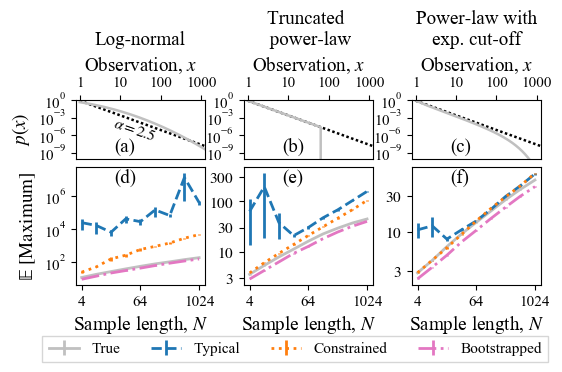

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [8]:
## Make Fig. 8
##
# Mean values of statistics:

min_val = 1;
gamma = 2.5;#Power-law
mu = 0; sigma = 1.5;#Log-normal
lam = 0.01;#Power-law with exponential cut-off
b = 64;#Truncated power-law

xMax = 2000

xx = [x for x in range(min_val, xMax)]

xx_brief = [x for x in range(2, 32)]

#Power-law pmf:
inv_norm = zeta(gamma, min_val);
yy_power_law = [x**-gamma/inv_norm for x in xx];

yy_slope = [(1/32)*x**-gamma/inv_norm for x in xx_brief];

#Log-normal pmf:
def unnormed_log_norm_cdf(mu, sigma, x):
    return (0.5 + 0.5*erf((np.log(x) - mu)/(np.sqrt(2)*sigma)))
inv_norm = 1 - unnormed_log_norm_cdf(mu, sigma, min_val - 0.5)
yy_log_norm = [(unnormed_log_norm_cdf(mu, sigma, x + 0.5) - unnormed_log_norm_cdf(mu, sigma, x - 0.5))/inv_norm for x in xx]

#Power-law with exponential cut-off pmf:
def unnormed_pow_law_exp_cut_off_cdf(gamma, x):
    return (1 - (x**-gamma*(x*lam)**gamma*gammainc(1 - gamma, x*lam))/lam)
inv_norm = 1 - unnormed_pow_law_exp_cut_off_cdf(gamma, min_val - 0.5)
yy_exp_cut_off = [(unnormed_pow_law_exp_cut_off_cdf(gamma, x + 0.5) - unnormed_pow_law_exp_cut_off_cdf(gamma, x - 0.5))/inv_norm for x in xx]

#Truncated power-law:
inv_norm = zeta(gamma, min_val) -  zeta(gamma, b + 1);
yy_trunc_power_law = [x**-gamma/inv_norm if ((x >= min_val) and x <= b) else 0 for x in xx];

marker_size = 1
line_width_fig_1 = 1.2

yy_list = [yy_log_norm, yy_trunc_power_law, yy_exp_cut_off]
leg_str_list = ['Log-normal', 'Power-law with' + '\n' + 'exponential cut-off', 'Truncated power-law']

n_cols = len(yy_list)
n_rows = 2

fig, ax = plt.subplots(n_rows, n_cols, sharex='none', sharey='none', figsize=(6, 2.1), gridspec_kw = {'height_ratios':[1,2]});

ax[0][0].set_title(r'' + '\n' + 'Log-normal', fontsize=MEDIUM_SIZE, y=1.8)
ax[0][1].set_title('Truncated \n power-law', fontsize=MEDIUM_SIZE, y=1.8)
ax[0][2].set_title(r'Power-law with' + '\n' + 'exp. cut-off', fontsize=MEDIUM_SIZE, y=1.8)

for jj in range(n_cols):
    ax_subplot = ax[0][jj]
    ax_subplot.plot(xx, yy_power_law, marker='None', linestyle=style_dict['AAFT'][1], color='k', markersize=marker_size, linewidth=1.5*line_width_fig_1)
    ax_subplot.plot(xx, yy_list[jj], marker='None', linestyle='-', color=style_dict['True'][0], markersize=marker_size, linewidth=1.5*line_width_fig_1)
    if (jj == 0):
        ax_subplot.text(6, 10**-7, r"$\alpha = 2.5$", fontsize=SMALL_SIZE, rotation=-19)
    
    ax_subplot.set_xscale('log')
    ax_subplot.set_yscale('log')
    x_ticks  = [1, 10, 100, 1000]
    ax_subplot.set_xticks(x_ticks)
    ax_subplot.set_xticklabels([str(x_t) for x_t in x_ticks])
    y_ticks  = [1, 10**-3, 10**-6, 10**-9]
    ax_subplot.set_yticks(y_ticks)
    ax_subplot.set_xlim(min_val - 0.2, 1250)
    ax_subplot.set_ylim(10**-10, 1)
    ax_subplot.set_xlabel(r'Observation, $x$')
    if (jj == 0):
        ax_subplot.set_ylabel('$p(x)$')
    ax_subplot.xaxis.set_ticks_position('top')
    ax_subplot.xaxis.set_label_position('top')

name_str = 'distribution-comparison-one-panel'

to_plot = [0, 1, 2, 4]
num_to_plot = len(to_plot)

surr_name_list = ['True', 'Typical', 'Constrained', 'Subsampled', 'Bootstrapped']
stat_name_str = 'max_deg'

num_tests = 10000;

name_list_list_1 = [['stat-vals-1-surr-1gamma-1-5-1-5_x_min-1_9N-4-1024_stat-', '_surr-type-', '_true-func-2_' + str(num_tests) + 'tests_eff_rej_rates_test.dat'],
                    ['stat-vals-1-surr-1gamma-2-5-2-5_x_min-1_9N-4-1024_stat-', '_surr-type-', '_true-func-21-5_' + str(num_tests) + 'tests_eff_rej_rates_test.dat'],
                    ['stat-vals-1-surr-1gamma-2-5-2-5_x_min-1_9N-4-1024_stat-', '_surr-type-', '_true-func-7_' + str(num_tests) + 'tests_eff_rej_rates_test.dat']
                   ];

x_min_list = [1, 12]

to_plot_str = str(to_plot[0])
for ii in range(1, num_to_plot):
    to_plot_str = to_plot_str + '-' + str(to_plot[ii])

name_str = 'mean-values_' + stat_name_str + '_log-normal_trunc_cut-off_min-val-1_' + to_plot_str;
max_power_2_p_1 = 11;

name_list_list_list = [name_list_list_1]

NN = [2**n for n in range(2, max_power_2_p_1, 1)]

l_list = []
name_list_list = name_list_list_list[0]
for jj in range(n_cols):
    ax_subplot = ax[1][jj]
    file_name_str_parts = name_list_list[jj]
    for ii in range(num_to_plot):
        surr_code = to_plot[ii]
        surr_name = surr_name_list[surr_code]
        style = style_dict[surr_name]
        file_name_str = file_name_str_parts[0] + stat_name_str + file_name_str_parts[1] + str(surr_code) + file_name_str_parts[2]
        zz = np.loadtxt(results_folder_name + '/' + 'mean_' + file_name_str)
        yy = zz
        zz_err = np.loadtxt(results_folder_name + '/' + 'std_' + file_name_str)
        yy_err = zz_err/np.sqrt(num_tests - 1)
        l_ii = ax_subplot.errorbar(NN, yy, yy_err, linestyle=style[1], color=style[0])
        l_list = l_list + [l_ii]
        ax_subplot.set_xscale('log')
        ax_subplot.set_xticks([4, 64, 1024])
        ax_subplot.xaxis.set_label_text('N')
        ax_subplot.set_xticklabels([str(4), str(64), str(1024)])
    ax_subplot.set_yscale('log')
    if (jj == 0):
        ax_subplot.set_yticks([10**n for n in range(2, 7, 2)])
    if (jj == 1):
        ax_subplot.set_yticks([3, 10, 30, 100, 300])
        ax_subplot.set_yticklabels([r'$3$', r'$10$', r'$30$', r'$100$', r'$300$'])
    if (jj == 2):
        ax_subplot.set_yticks([3, 10, 30])
        ax_subplot.set_yticklabels([r'$3$', r'$10$', r'$30$'])
ax_subplot = ax[1][0]
ax_subplot.yaxis.set_label_text(r'${\rm\mathbb{E}}\ [\rm{Maximum}]$')

for kk in range(n_rows):
    if (kk == 0):
        lett_rel_pos_x = 0.30;
        lett_rel_pos_y = 0.12;
    else:
        lett_rel_pos_x = 0.30;
        lett_rel_pos_y = 0.87;
    for jj in range(n_cols):
        ax_subplot = ax[kk][jj]
        num = kk*n_cols + jj + 1
        place_letter_log_scale(ax_subplot, num, lett_rel_pos_x, lett_rel_pos_y, MEDIUM_SIZE)
        ax_subplot.minorticks_off()

for ii in range(n_cols):
    ax[1][ii].xaxis.set_label_text(r'Sample length, $N$')

fig.subplots_adjust(bottom=0, hspace=0.1, wspace=0.3)
ax[1][1].legend(handles = l_list, labels=[surr_name_list[ii] for ii in to_plot], loc='upper center', bbox_to_anchor=(0.4, -0.37), fancybox=False, shadow=False, ncol=4)

plt.show()
fig.savefig(fig_folder_name + '/' + name_str + '.eps', bbox_inches='tight')
fig.savefig(fig_folder_name + '/' + name_str + '.png', bbox_inches='tight')
fig.savefig(fig_folder_name + '/' + name_str + '.pdf', bbox_inches='tight')

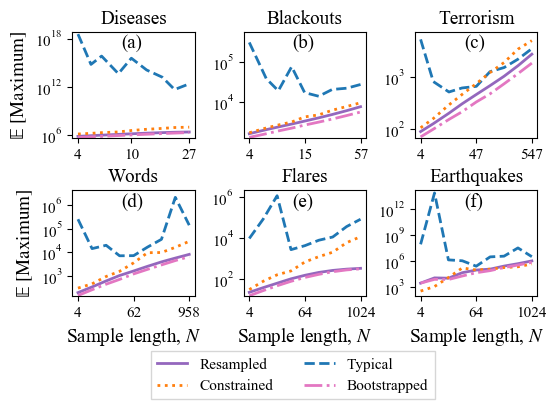

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [9]:
# Make Fig. 9

to_plot = [0, 1, 2, 4]
num_to_plot = len(to_plot)

surr_name_list = ['Resampled', 'Typical', 'Constrained', 'Subsampled', 'Bootstrapped']
stat_name_str = 'max_deg'

num_tests = 10000;

name_list_list_1 = [['stat-vals-1-surr-1gamma-2-5-2-5_x_min-2317_9N-4-27_stat-', '_surr-type-', '_true-func-53diseases-rescaled_' + str(num_tests) + 'tests_eff_rej_rates_test.dat'],
                    ['stat-vals-1-surr-1gamma-2-5-2-5_x_min-235_9N-4-57_stat-', '_surr-type-', '_true-func-55blackouts_' + str(num_tests) + 'tests_eff_rej_rates_test.dat'],
                    ['stat-vals-1-surr-1gamma-2-5-2-5_x_min-12_9N-4-547_stat-', '_surr-type-', '_true-func-51terrorism_' + str(num_tests) + 'tests_eff_rej_rates_test.dat'],
                   ];

name_list_list_2 = [['stat-vals-1-surr-1gamma-2-5-2-5_x_min-7_9N-4-958_stat-', '_surr-type-', '_true-func-52words_' + str(num_tests) + 'tests_eff_rej_rates_test.dat'],
                    ['stat-vals-1-surr-1gamma-2-5-2-5_x_min-1_9N-4-1024_stat-', '_surr-type-', '_true-func-59flares-normed_' + str(num_tests) + 'tests_eff_rej_rates_test.dat'],
                    ['stat-vals-1-surr-1gamma-2-5-2-5_x_min-1_9N-4-1024_stat-', '_surr-type-', '_true-func-62earthquakes_' + str(num_tests) + 'tests_eff_rej_rates_test.dat']
                   ];

title_list_list = [['Diseases', 'Blackouts', 'Terrorism'], ['Words', 'Flares', 'Earthquakes']]

yy_tick_list_list_list = [[[10**0, 10**6, 10**12, 10**18, 10**24], [10**3, 10**4, 10**5, 10**6], [10**0, 10**1, 10**2, 10**3, 10**4, 10**5, 10**6]],\
                          [[10**0, 10**1, 10**2, 10**3, 10**4, 10**5, 10**6, 10**7], [10**0, 10**2, 10**4, 10**6, 10**8], [10**3, 10**6, 10**9, 10**12, 10**15, 10**18, 10**21]]]

N_list_list = [[27, 57, 547], [958, 1024, 1024]]
x_min_list = [r'$\hat{x}_{\rm{min}}$', r'$\hat{x}_{\rm{min}}$']

to_plot_str = str(to_plot[0])
for ii in range(1, num_to_plot):
    to_plot_str = to_plot_str + '-' + str(to_plot[ii])

name_str = 'mean-values_' + stat_name_str + '_diseases_blackouts_terrorism_words_flares_earthquakes_min-val-1-x-min-hat_' + to_plot_str;

max_power_2_p_1 = 11;

name_list_list_list = [name_list_list_1, name_list_list_2]

NN = [2**n for n in range(len(x_min_list), max_power_2_p_1, 1)]
num_diff_size = 9

n_cols = len(name_list_list_list[0])
n_rows = len(name_list_list_list[0][0])

fig, ax = plt.subplots(len(x_min_list), n_cols, sharex='none', sharey='none', figsize=(6, 3))

lett_rel_pos_x_1 = 0.8;
lett_rel_pos_y_1 = 0.8;

lett_rel_pos_x_2 = 0.8;
lett_rel_pos_y_2 = 0.05;

lett_rel_pos_x = 0.40;
lett_rel_pos_y = 0.85;

for kk in range(len(x_min_list)):
    if (len(x_min_list) == 1):
        this_ax = ax
    else:
        this_ax = ax[kk]
    name_list_list = name_list_list_list[kk]
    for jj in range(n_cols):
        yy_min = np.inf
        yy_max = -np.inf
        ax_subplot = this_ax[jj]
        file_name_str_parts = name_list_list[jj]
        N_data = N_list_list[kk][jj]
        NMax = min(N_data, 1024); NN = 2.**np.linspace(log(4, 2), log(NMax, 2), num=num_diff_size, endpoint=True)
        NN = [int(np.round(n)) for n in NN]
        num_diff_size = len(NN);
        l_list = []
        for ii in range(num_to_plot):
            surr_code = to_plot[ii]
            surr_name = surr_name_list[surr_code]
            style = style_dict[surr_name]
            file_name_str = file_name_str_parts[0] + stat_name_str + file_name_str_parts[1] + str(surr_code) + file_name_str_parts[2]
            zz = np.loadtxt(results_folder_name + '/' + 'mean_' + file_name_str)
            yy = zz
            zz_err = np.loadtxt(results_folder_name + '/' + 'std_' + file_name_str)
            yy_err = zz_err/np.sqrt(num_tests - 1)
            yy_min = min(yy_min, np.min(yy - yy_err))
            yy_max = max(yy_max, np.max(yy + yy_err))
            l_ii = ax_subplot.errorbar(NN, yy, linestyle=style[1], color=style[0])
            l_list = l_list + [l_ii]
            ax_subplot.set_xticks([])
            ax_subplot.set_xticklabels([])
        NNLabel = 2.**np.linspace(log(4, 2), log(NMax, 2), num=3, endpoint=True)
        NNLabel = [int(np.round(n)) for n in NNLabel]
        NNStr = [str(n) for n in NNLabel]
        ax_subplot.set_xscale('log')
        ax_subplot.set_yscale('log')
        ax_subplot.set_xticks(NNLabel)
        ax_subplot.set_xticklabels(NNStr)
        yy_tick_list = yy_tick_list_list_list[kk][jj]
        yy_tick_label_list = [str(y_t) for y_t in yy_tick_list]
        ax_subplot.set_yticks([float(y_t) for y_t in yy_tick_list])
        if (kk == 0) and ((jj == -1)):
            ax_subplot.set_yticklabels(yy_tick_label_list)
        ax_subplot.minorticks_off()
        ylim = ax_subplot.get_ylim()
        yy_min = max(yy_min, ylim[0])
        ax_subplot.set_ylim([yy_min, yy_max])
        ax_subplot.set_title(title_list_list[kk][jj], fontsize=MEDIUM_SIZE)
    ax_subplot = this_ax[0]
    ax_subplot.yaxis.set_label_text(r'${\rm\mathbb{E}}\ [\rm{Maximum}]$')
    name_list_list = name_list_list_list[kk]
    for jj in range(n_cols):
        ax_subplot = this_ax[jj]
        num = kk*n_cols + jj + 1
        place_letter_log_scale(ax_subplot, num, lett_rel_pos_x, lett_rel_pos_y, MEDIUM_SIZE)

for ii in range(n_cols):
    this_ax[ii].xaxis.set_label_text(r'Sample length, $N$')

fig.subplots_adjust(bottom=0, wspace=0.4, hspace = 0.5)
ax[1][1].legend(handles = flip(l_list, 2), labels = flip([surr_name_list[ii] for ii in to_plot], 2), loc='upper center', bbox_to_anchor=(0.4, -0.45), fancybox=False, shadow=False, ncol=2)

plt.show()
fig.savefig(fig_folder_name + '/' + name_str + '.eps', bbox_inches='tight')
fig.savefig(fig_folder_name + '/' + name_str + '.png', bbox_inches='tight')
fig.savefig(fig_folder_name + '/' + name_str + '.pdf', bbox_inches='tight')

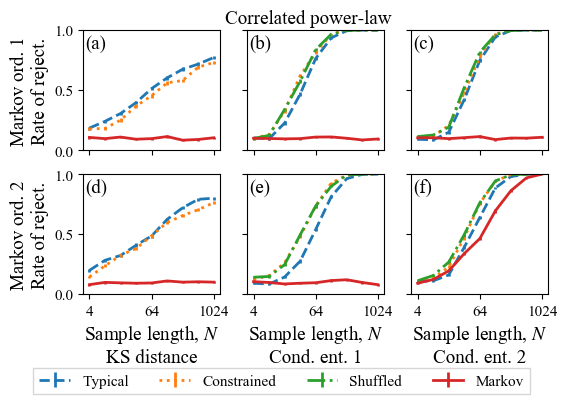

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [10]:
# Make Fig. 10
min_deg_list = [1, 1]
min_N = 4; max_N = 1024; num_N = 1 + int(np.round(log(max_N/min_N, 2))); NN = [2**n for n in range(int(np.round(log(min_N, 2))), int(np.round(log(max_N, 2))) + 1, 1)]
stat_list = ['ks_dist', 'con_e_1', 'co_en_o2']
stat_name_list = ['KS distance', 'Cond. ent. 1', 'Cond. ent. 2']
surr_list = ['typic', 'const', 'shuff', 'mccon']
surr_name_list = ['Typical', 'Constrained', 'Shuffled', r'Markov']
rej_type = 'pow'
rej_type_name = 'Rate of reject.'
distrib_list = ['c9r_pl_bin_3', 'c92_pl_bin_3']
distrib_name_list = ['Markov ord. 1', 'Markov ord. 2']
num_tests = 1000

n_stats = len(stat_name_list)

name_part_1 = '1gamma-2-5-2-5-2-5_x_min-'
name_part_2 = '_' + str(num_N) + 'N-' + str(min_N) + '-' + str(max_N) + '_stat-'
name_part_3 = '_surr-'
name_part_4 = '_rej-' + rej_type + '_'
name_part_5 = '_nom_size-0-1_9surr_' + str(num_tests) + 'tests_safe-1_dir_rej_rates_test.dat'


x_min_list = min_deg_list

lett_rel_pos_x = 0.0002;
lett_rel_pos_y = 0.85;

l_list = []
fig, ax = plt.subplots(len(min_deg_list), n_stats, sharex='col', sharey='row', figsize=(6, 3))
for hh in range(len(min_deg_list)):
    min_deg = min_deg_list[hh]
    distrib = distrib_list[hh]
    distrib_name = distrib_name_list[hh]
    name_str = r'Markov-power-law' + '_' + str(len(stat_list)) + 'stats' + '_nom-size-0-1_num-surr-9_num-tests_' + str(num_tests) + '_' + rej_type + '_min-val-' + str(min(min_deg_list)) + '-' + str(max(min_deg_list)) + '_' + str(len(surr_list)) + 'surr_' + str(num_N) + 'N' + str(min_N) + '-' + str(max_N)
    for jj in range(n_stats):
        stat = stat_list[jj]
        ax_subplot = ax[hh][jj]
        for ii in range(len(surr_list)):
            surr_name = surr_name_list[ii]
            style = style_dict[surr_name]
            surr = surr_list[ii]
            file_name_str = name_part_1 + str(min_deg) + name_part_2 + stat + name_part_3 + surr + name_part_4 + distrib + name_part_5
            zz = np.loadtxt(results_folder_name + '/' + file_name_str)
            yy = zz[:]
            if (ii == 2) and (jj <= 0):
                yy = np.nan*yy
            yy_err = np.sqrt(yy*(1-yy)/num_tests)
            l_ii = ax_subplot.errorbar(NN, yy, yy_err, linestyle=style[1], color=style[0])
            l_list = l_list + [l_ii]
            ax_subplot.set_xscale('log')
            ax_subplot.set_xticks([4, 64, 1024])
            ax_subplot.set_yticks([0, 0.5, 1])
        ax_subplot.set_ylim(0, 1)
        num = hh*n_stats + jj + 1
        place_letter(ax_subplot, num, lett_rel_pos_x, lett_rel_pos_y, MEDIUM_SIZE)
    ax_subplot = ax[hh][0]
    ax_subplot.yaxis.set_label_text(r'' + distrib_name_list[hh] + '\n' + rej_type_name)

for jj in range(n_stats):
    ax_subplot = ax[hh][jj]
    ax_subplot.xaxis.set_label_text('N')
    ax_subplot.set_xticklabels([str(4), str(64), str(1024)])
    ax_subplot.xaxis.set_label_text(r'Sample length, $N$' + '\n' + stat_name_list[jj])

fig.suptitle('Correlated power-law', fontsize=MEDIUM_SIZE, y=0.95)

fig.subplots_adjust(bottom=0, wspace=0.2)
ax_subplot = ax[hh][1]
ax_subplot.legend(handles = l_list, labels=surr_name_list, loc='upper center', bbox_to_anchor=(0.25, -0.55), fancybox=False, shadow=False, ncol=4)

plt.show()
fig.savefig(fig_folder_name + '/' + name_str + '.eps', bbox_inches='tight')
fig.savefig(fig_folder_name + '/' + name_str + '.png', bbox_inches='tight')
fig.savefig(fig_folder_name + '/' + name_str + '.pdf', bbox_inches='tight')

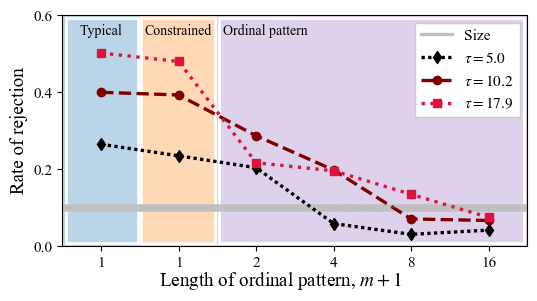

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [11]:
# Make Fig. 11

min_N = 4; max_N = 1024; num_N = 1 + int(np.round(log(max_N/min_N, 2))); NN = [2**n for n in range(int(np.round(log(min_N, 2))), int(np.round(log(max_N, 2))) + 1, 1)]
stat = 'ks_dist'
stat_name_list = 'KS-distance'

surr_list = ['typic', 'const', 'conoplt2tr100000', 'conoplt4tr100000', 'conoplt8tr100000', 'conoplt16tr100000']
surr_name_list = ['Typical', 'Constrained', 'OP,  $m+1=2$', 'OP,  $m+1=4$', 'OP,  $m+1=8$', 'OP,  $m+1=16$']
style_key_list = ['Typical', 'Constrained'] + 4*['Ordinal pattern']

fig_11_colour_list = ['0.5', '0.3', '0']
fig_11_colour_list = ['black', 'maroon', 'crimson']

fig_11_line_styles = [(0, (1, 1)), '--', ':']
fig_11_marker_styles = ['d', 'o', 's']
line_width_fig_11 = 2.4
fig_11_alpha = 0.3

num_surr = len(surr_list)

nom_size = 0.1

def lyap(a):
    lam = a*np.log(1/a) + (1 - a)*np.log(1/(1 - a))
    return lam

def lyap_time(a):
    lam = lyap(a)
    t = 1/lam
    return t

def dp(x, d=2):
    s = ("{:." + str(d) + "f}").format(x)
    return s

def lyap_time_str(a):
    t = lyap_time(a)
    s = dp(t, d=1)
    return s

rej_type = 'pow'
rej_type_name = 'Rate of rejection'
a_list = [0.95, 0.98, 0.99]
distrib_list = ['asym_tent_pl_a-0-' + str(int(np.round(100*a))) for a in a_list]
distrib_name_list = [r'$\tau = ' + dp(lyap_time(a), d=1) + '$' for a in a_list]
num_distrib = len(distrib_list)

num_tests = 1000

n_stats = len(stat_name_list)

name_part_1 = '1gamma-2-5-2-5-2-5_x_min-'
name_part_2 = '_' + str(num_N) + 'N-' + str(min_N) + '-' + str(max_N) + '_stat-'
name_part_3 = '_surr-'
name_part_4 = '_rej-' + rej_type + '_'
name_part_5 = '_nom_size-0-1_9surr_' + str(num_tests) + 'tests_safe-1_dir_rej_rates_test.dat'
x_min = 1

lett_rel_pos_x = 0.83;
lett_rel_pos_y = 0.85;

min_N = 4; max_N = 1024; num_N = 1 + int(np.round(log(max_N/min_N, 2))); NN = [2**n for n in range(int(np.round(log(min_N, 2))), int(np.round(log(max_N, 2))) + 1, 1)]
ind_N = 8; N = NN[ind_N]
ind_N_list = [8]
num_N_considered = len(ind_N_list)

fig, ax = plt.subplots(1, 1, figsize=(6, 3));

for kk in range(num_N_considered):
    ind_N = ind_N_list[kk]
    N = NN[ind_N]
    
    if (num_N_considered > 1):
            ax_subplot = ax[kk]
    else:
        ax_subplot = ax

    this_line = ax_subplot.errorbar(np.nan, np.nan, linestyle='-', color='silver', capsize=0, linewidth=line_width_fig_11)
    l_list = [this_line]
    
    for jj in range(num_distrib):
        distrib = distrib_list[jj]
        distrib_name = distrib_name_list[jj]
        y_list = []
        y_err_list = []
        col_list = []
        line_style_list = []
        for ii in range(num_surr):
            surr_name = surr_name_list[ii]
            surr = surr_list[ii]
            file_name_str = name_part_1 + str(x_min) + name_part_2 + stat + name_part_3 + surr + name_part_4 + distrib + name_part_5
            zz = np.loadtxt(results_folder_name + '/' + file_name_str)
            yy = zz[:]
            y = yy[ind_N]
            y_err = np.sqrt(y*(1-y)/num_tests)
            y_list = y_list + [y]
            y_err_list = y_err_list + [y_err]
        
        col = fig_11_colour_list[jj]
        line_style = fig_11_line_styles[jj]
        marker_style = fig_11_marker_styles[jj]
        this_line = ax_subplot.errorbar(range(num_surr), y_list, color=col, linestyle=line_style, linewidth=line_width_fig_11, marker=marker_style)
        l_list = l_list + [this_line]
    
    xx = np.arange(-0.5, num_surr - 0.5 + 0.005, 0.01)
    yy = nom_size + np.array([0 for x in xx])
    yy_err = np.sqrt(yy*(1-yy)/num_tests)
    this_line = ax_subplot.errorbar(xx, yy, yy_err, linestyle='-', color='silver', elinewidth=1, capsize=0, linewidth=0.1*line_width)
    
    ax_subplot.set_xticks(range(num_surr))
    ax_subplot.set_xticklabels([1, 1, 2, 4, 8, 16])
    
    #Add some text:
    y = 0.55
    x = -0.28
    ax_subplot.text(x, y, 'Typical', fontsize=10, color='k', fontweight='heavy')
    x = 0.56
    ax_subplot.text(x, y, 'Constrained', fontsize=10, color='k', fontweight='heavy')
    x = 1.57
    ax_subplot.text(x, y, 'Ordinal pattern', fontsize=10, color='k', fontweight='heavy')
    
    y = -0.1
    ax_subplot.set_xlabel('Length of ordinal pattern, $m + 1$')
    ax_subplot.xaxis.set_label_coords(0.47, y)
    
    if (num_N_considered > 1):
        ax_subplot.yaxis.set_label_text('$N = ' + str(N) + '$' + '\n' + rej_type_name)
    else:
        ax_subplot.yaxis.set_label_text(rej_type_name)

    ax_subplot.set_yticks([0, 0.2, 0.4, 0.6])
    ax_subplot.set_ylim(0, 0.6)
    ax_subplot.set_xlim(-0.5, num_surr - 0.5)

    num = kk*num_distrib + jj + 1
    
    plt.axvspan(-0.5, 0.5, facecolor=style_dict['Typical'][0], alpha=fig_11_alpha)
    plt.axvspan(0.5, 1.5, facecolor=style_dict['Constrained'][0], alpha=fig_11_alpha)
    plt.axvspan(1.5, 5.5, facecolor=style_dict['Ordinal pattern'][0], alpha=fig_11_alpha)

    ax.add_patch(Rectangle((-0.45, 0.008), 0.92, 0.584, color='w', fc='none', linewidth=2, linestyle="-"))
    ax.add_patch(Rectangle((0.52, 0.008), 0.95, 0.584, color='w', fc='none', linewidth=2, linestyle="-"))
    ax.add_patch(Rectangle((1.52, 0.008), 3.93, 0.584, color='w', fc='none', linewidth=2, linestyle="-"))
    
num_col = 1
ax_subplot.legend(handles = flip(l_list, num_col), labels = flip(['Size'] + distrib_name_list, num_col), loc='upper right', fancybox=False, shadow=False, ncol=num_col, framealpha=1)
plt.show()

name_str = 'tent-map-power-law-v2-2'
fig.savefig(fig_folder_name + '/' + name_str + '.eps', bbox_inches='tight')
fig.savefig(fig_folder_name + '/' + name_str + '.png', bbox_inches='tight')
fig.savefig(fig_folder_name + '/' + name_str + '.pdf', bbox_inches='tight')

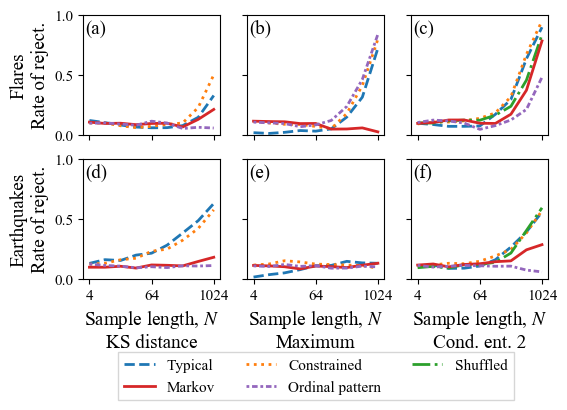

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [12]:
# Make Fig. 12

min_deg_list = [1, 1]
N_list_list = [[4, 1024], [4, 1024]]
gamma_str_list = ['2-5', '2-5']
min_N = 4; max_N = 1024; num_N = 1 + int(np.round(log(max_N/min_N, 2))); NN = [2**n for n in range(int(np.round(log(min_N, 2))), int(np.round(log(max_N, 2))) + 1, 1)]
stat_list = ['ks_dist', 'max_deg', 'co_en_o2']
stat_name_list = ['KS distance', 'Maximum', 'Cond. ent. 2']
surr_list = ['typic', 'const', 'shuff', 'mcconb3o1tr100000', 'conoplt16tr100000']
surr_name_list = ['Typical', 'Constrained', 'Shuffled', 'Markov', r'Ordinal pattern']
rej_type_list = ['pow', 'pow']
rej_type_name_list = ['Rate of reject.', 'Rate of reject.']
distrib_list = ['flares-normed', 'earthquakes']
y_label_list = ['Flares', 'Earthquakes']
distrib_name = 'log-normal-earthquakes-piecewise-constrained'
num_tests = 1000

n_stats = len(stat_name_list)

name_part_3 = '_surr-'
name_part_4 = '_rej-'
name_part_4_5 = '_'
name_part_5 = '_nom_size-0-1_9surr_' + str(num_tests) + 'tests_safe-1_dir_rej_rates_test.dat'


name_str = 'flares_earthquakes' + '_' + str(len(stat_list)) + 'stats' + '_nom-size-0-1_num-surr-9_num-tests_' + str(num_tests) + '_min-deg-' + str(min(min_deg_list)) + '-' + str(min(min_deg_list)) + '_' + str(len(surr_list)) + 'surr_' + str(num_N) + 'N' + str(min_N) + '-' + str(max_N)

fig, ax = plt.subplots(len(distrib_list), n_stats, sharex='col', sharey='row', figsize=(6, 3))

lett_rel_pos_x = 0.0002;
lett_rel_pos_y = 0.85;

l_list = []
for kk in range(len(min_deg_list)):
    gamma_str = gamma_str_list[kk]
    name_part_1 = '1gamma-' + gamma_str + '-' + gamma_str + '-' + gamma_str + '_x_min-'
    min_deg = min_deg_list[kk]
    distrib = distrib_list[kk]
    N_list = N_list_list[kk]
    rej_type = rej_type_list[kk]
    rej_type_name = rej_type_name_list[kk]
    min_N = N_list[0]
    max_N = N_list[1]
    name_part_2 = '_' + str(num_N) + 'N-' + str(min_N) + '-' + str(max_N) + '_stat-'
    for jj in range(n_stats):
        stat = stat_list[jj]
        ax_subplot = ax[kk][jj]
        for ii in range(len(surr_list)):
            surr_name = surr_name_list[ii]
            style = style_dict[surr_name]
            surr = surr_list[ii]
            file_name_str = name_part_1 + str(min_deg) + name_part_2 + stat + name_part_3 + surr + name_part_4 + rej_type + name_part_4_5 + distrib + name_part_5
            zz = np.loadtxt(results_folder_name + '/' + file_name_str)
            yy = zz[:]
            if (ii == 2) and (jj <= 1):
                yy = np.nan*yy
            yy_err = np.sqrt(yy*(1-yy)/num_tests)
            #l_ii = ax_subplot.errorbar(NN, yy, yy_err, linestyle=style[1], color=style[0])
            l_ii = ax_subplot.errorbar(NN, yy, linestyle=style[1], color=style[0])
            l_list = l_list + [l_ii]
            ax_subplot.set_xscale('log')
            ax_subplot.set_xticks([4, 64, 1024])
            if (rej_type == 'siz'):
                ax_subplot.set_yticks([0, 0.1, 0.2])
                ax_subplot.set_ylim(0, 0.2)
            else:
                ax_subplot.set_yticks([0, 0.5, 1])
                ax_subplot.set_ylim(0, 1)
            if (kk == (len(min_deg_list) - 1)):
                ax_subplot.xaxis.set_label_text('N')
                ax_subplot.set_xticklabels([str(4), str(64), str(1024)])
            else:
                ax_subplot.set_xticklabels(['','',''])
        num = kk*n_stats + jj + 1
        place_letter(ax_subplot, num, lett_rel_pos_x, lett_rel_pos_y, MEDIUM_SIZE)
    ax_subplot = ax[kk][0]
    ax_subplot.yaxis.set_label_text(y_label_list[kk] + '\n' + rej_type_name)

for jj in range(n_stats):
    ax[len(min_deg_list) - 1][jj].xaxis.set_label_text(r'Sample length, $N$' + '\n' + stat_name_list[jj])

fig.subplots_adjust(bottom=0, wspace=0.2)
ax[kk][1].legend(handles = flip(l_list, 3), labels = flip(surr_name_list, 3), loc='upper center', bbox_to_anchor=(0.5, -0.55), fancybox=False, shadow=False, ncol=3)

plt.show()
fig.savefig(fig_folder_name + '/' + name_str + '.eps', bbox_inches='tight')
fig.savefig(fig_folder_name + '/' + name_str + '.png', bbox_inches='tight')
fig.savefig(fig_folder_name + '/' + name_str + '.pdf', bbox_inches='tight')

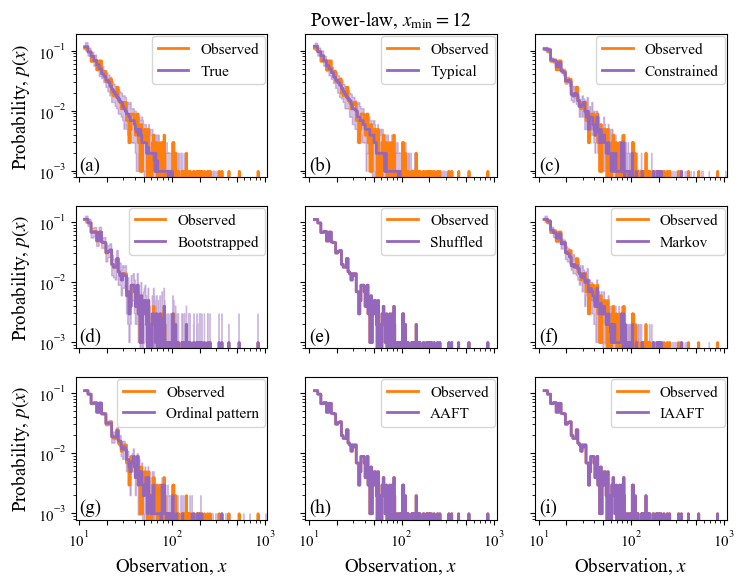

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

In [13]:
# Make Fig. S1

num_surr_types = 11

num_realis = 100

save_name_list = ['surr_N-1024_gamma-2.5_x-min-12_' + str(num_surr_types) + 'surr-types_100realis_b-3_L-16_tran-100000.json']

num_save_name = len(save_name_list)

surr_types_to_cons = [1, 2, 3, 4, 5, 6, 8, 9, 10]

num_surr_types_to_cons = len(surr_types_to_cons)

num_col = 3
num_rep = int(np.round(np.ceil(num_surr_types_to_cons/num_col)))
num_row = num_save_name*num_rep

lett_rel_pos_x = 0.02
lett_rel_pos_y = 0.05

f = 1.4

fig, ax = plt.subplots(num_row, num_col, sharex='col', sharey='row', figsize=(f*2*num_col, f*1.5*num_row))

for k in range(num_save_name):
    save_name = save_name_list[k]

    [N, scale_exp, x_min, seq, num_surr, b, L, num_trans, surr_method_list, surr_method_name_list, surr_val_seq_list_list, save_name] = json.loads(codecs.open(results_folder_name + '/' + save_name, 'r', encoding='utf-8').read())

    max_val = np.max(surr_val_seq_list_list)
    
    bin_edges = np.arange(x_min - 0.5, max_val - 0.5 + 10**-6, 1).tolist()
    num_bins = len(bin_edges) - 1
    xx_count = [bin_edges[0]] + [0.5*(bin_edges[i] + bin_edges[i + 1]) for i in range(num_bins)] + [bin_edges[-1]]

    yy, bin_edges = np.histogram(seq, bin_edges, density='true')
    yy_count_obs = np.concatenate(([yy[0]], yy, [yy[-1]])).tolist()

    hist_count_list_list = []
    for i in range(num_surr_types):
        surr_val_seq_list = surr_val_seq_list_list[i]
        hist_count_list = []
        for j in range(num_surr):
            surr_val_seq = surr_val_seq_list[j]
            yy, bin_edges = np.histogram(surr_val_seq, bin_edges, density='true')
            yy = np.concatenate(([yy[0]], yy, [yy[-1]]))
            hist_count_list = hist_count_list + [yy]
        hist_count_list_list = hist_count_list_list + [hist_count_list]

    hist_count_array = np.array(hist_count_list_list)
    hist_count_low = np.quantile(hist_count_array, 0.05, axis=1)
    hist_count_med = np.quantile(hist_count_array, 0.5, axis=1)
    hist_count_upp = np.quantile(hist_count_array, 0.95, axis=1)

    hist_count_err_low = -(hist_count_low - hist_count_med)
    hist_count_err_low[:, [0, -1]] = 0
    hist_count_err_upp = hist_count_upp - hist_count_med
    hist_count_err_upp[:, [0, -1]] = 0

    handle_list = [0, 0]
    
    x_lim_low = xx_count[min([np.nonzero(hist_count_med[i, :])[0][0] for i in range(num_surr_types)])]
    x_lim_upp = xx_count[max([np.nonzero(hist_count_med[i, :])[0][-1] for i in range(num_surr_types)])]
    x_lim = 0.8*x_lim_low, 1.25*x_lim_upp
    y_lim = 0.8*np.min(hist_count_array[hist_count_array > 0]), 1.25*np.max(hist_count_array)

    for j in range(num_surr_types_to_cons):
        
        i = surr_types_to_cons[j]
        surr_name = surr_method_name_list[i]
        if (surr_name == 'Markov 1'):
            surr_name = 'Markov'
        if (surr_name == 'Markov 2'):
            surr_name = 'Markov'
        style = style_dict[surr_name]

        ax_subplot = ax[k + (j//num_col)*num_save_name][j%num_col]
        handle_list[0] = ax_subplot.errorbar(xx_count, yy_count_obs, drawstyle='steps-mid', color='tab:orange')
        yy = hist_count_med[i]
        yy_low = hist_count_err_low[i].tolist()
        yy_upp = hist_count_err_upp[i].tolist()
        handle_list[1]=ax_subplot.errorbar(xx_count, yy, drawstyle='steps-mid', color='tab:purple', rasterized=True)
        ax_subplot.fill_between(xx_count, yy - yy_low, yy + yy_upp, step='mid', alpha=0.4, color='tab:purple', rasterized=True)
        ax_subplot.set_xscale('log')
        ax_subplot.set_yscale('log')
        ax_subplot.legend(handles=handle_list, labels=['Observed', surr_name], loc='upper right', bbox_to_anchor=(1.03, 1.04))
        ax_subplot.set_ylim(y_lim)
        if (j%num_col == 0):
            ax_subplot.set_ylabel(r'Probability, $p(x)$')

        ax_subplot.set_xticks([1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10**4, 2*10**4, 5*10**4, 10**5])
        if (k == (num_save_name - 1)) and ((j//num_col) == num_rep - 1):
            ax_subplot.set_xlabel('Observation, $x$')
        ax_subplot.set_xlim(x_lim)
        
        kk = k + (j//num_col)*num_save_name
        jj = j%num_col
        num = kk*num_col + jj + 1
        place_letter_log_scale(ax_subplot, num, lett_rel_pos_x, lett_rel_pos_y, MEDIUM_SIZE)

fig.suptitle('Power-law, ' + r'$x_{\rm{min}} = ' + str(x_min) + '$', fontsize=MEDIUM_SIZE, y=0.92)

plt.show()

name_str = 'histograms-comparing-surrogates-original_' + str(num_realis) + 'surr'

fig.savefig(fig_folder_name + '/' + name_str + '.png', bbox_inches='tight')
fig.savefig(fig_folder_name + '/' + name_str + '.eps', bbox_inches='tight')
fig.savefig(fig_folder_name + '/' + name_str + '.pdf', bbox_inches='tight')

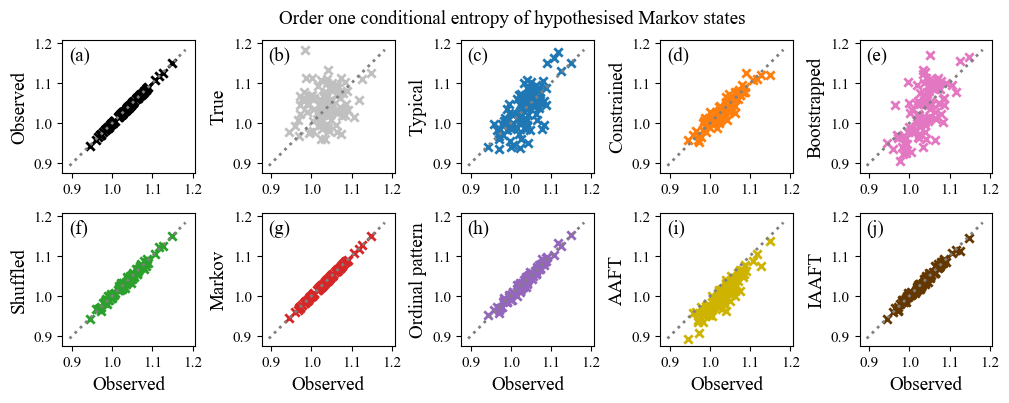

In [14]:
# Make Fig. S2
# 
# Function to calculate conditional entropy of order one relative to hypothesised MNarkov states
def cond_ent_o_1_b_3(val_seq, x_min):#Conditional entropy of order 1 after log-binning with base b = 3
    b = 3
    bin_edges, val_seq, low_lim_list, upp_lim_list = log_bin(val_seq, b, x_min)  
    u, val_seq = np.unique(val_seq, return_inverse=True)#This is here because cond_entropy seemed sometimes to have trouble with very large integers.
    return cond_entropy(val_seq[1:], val_seq[:-1])
# 
# Load surrogate previously generated time series and calculate their conditional entropy of order one
# 
[N, scale_exp, x_min, seq_list, num_surr, b, L, num_trans, surr_method_list, surr_method_name_list, surr_val_seq_list_list_list, save_name] = json.loads(codecs.open(results_folder_name + '/' + 'surr_100_trials_N-1024_gamma-2.5_x-min-1_11surr-types_1realis_b-3_L-16_tran-100000.json', 'r', encoding='utf-8').read())
num_trials = len(surr_val_seq_list_list_list)
num_surr_types = len(surr_method_list)
cond_ent_o_1_array = np.zeros((num_trials, num_surr_types))
cond_ent_o_1_b_3_array = np.zeros((num_trials, num_surr_types))
for i in range(num_trials):
    for j in range(num_surr_types):
        surr_val_seq = surr_val_seq_list_list_list[i][j][0]
        cond_ent_o_1_array[i, j] = cond_ent_o_1(surr_val_seq)
        cond_ent_o_1_b_3_array[i, j] = cond_ent_o_1_b_3(surr_val_seq, x_min)


stat_array_list = [cond_ent_o_1_b_3_array]
stat_name_list = ['Cond. ent. 1 (binned)']
num_stats = len(stat_name_list)

surr_types_to_cons = [0, 1, 2, 3, 4, 5, 6, 8, 9, 10]

num_surr_types_to_cons = len(surr_types_to_cons)

num_col = 5
num_rep = int(np.round(np.ceil(num_surr_types_to_cons/num_col)))
num_row = num_stats*num_rep

lett_rel_pos_x = 0.05
lett_rel_pos_y = 0.85

fig, ax = plt.subplots(num_row, num_col, sharex='none', sharey='none', figsize=(2.4*num_col, 1.8*num_row))

for j in range(num_stats):
    
    stat_array = stat_array_list[j]
    max_val = np.max(np.array(stat_array))
    min_val = np.min(np.array(stat_array))
    stat_name = stat_name_list[j]
    obs_stat_list = stat_array[:, 0]
    
    for k in range(num_surr_types_to_cons):
        i = surr_types_to_cons[k]
        surr_name = surr_method_name_list[i]
        if (surr_name == 'Markov 1'):
            surr_name = 'Markov'
        if (surr_name == 'Markov 2'):
            surr_name = 'Markov'
        style = style_dict[surr_name]
        
        surr_method_name = surr_method_name_list[i]
        surr_stat_list = stat_array[:, i]
        ax_subplot = ax[j + (k//num_col)*num_stats][k%num_col]
        ax_subplot.errorbar([min_val, max_val], [min_val, max_val], linestyle=':', color=[0.5, 0.5, 0.5])
        ax_subplot.scatter(obs_stat_list, surr_stat_list, marker='x', color=style[0])
        ax_subplot.set_ylabel(surr_name)
            
        ax_subplot.set_yticks(ax_subplot.get_xticks())
        ax_subplot.axis('square')
        if (j == num_stats - 1)  and ((k//num_col) == num_rep - 1):
            ax_subplot.set_xlabel('Observed')
        
        ax_subplot.set_xticks(ax_subplot.get_yticks())
        
        ax_fact = 0.98
        ax_subplot.set_xlim(min_val*ax_fact, max_val/ax_fact)
        ax_subplot.set_ylim(min_val*ax_fact, max_val/ax_fact)
        
        num = k + 1
        place_letter(ax_subplot, num, lett_rel_pos_x, lett_rel_pos_y, MEDIUM_SIZE)

fig.subplots_adjust(bottom=0, wspace=0.5)
fig.suptitle(r'Order one conditional entropy of hypothesised Markov states', fontsize=MEDIUM_SIZE, y=0.95)
        
plt.show()

name_str = 'cond-entropy-order-1'

fig.savefig(fig_folder_name + '/' + name_str + '.eps', bbox_inches='tight')
fig.savefig(fig_folder_name + '/' + name_str + '.png', bbox_inches='tight')
fig.savefig(fig_folder_name + '/' + name_str + '.pdf', bbox_inches='tight')

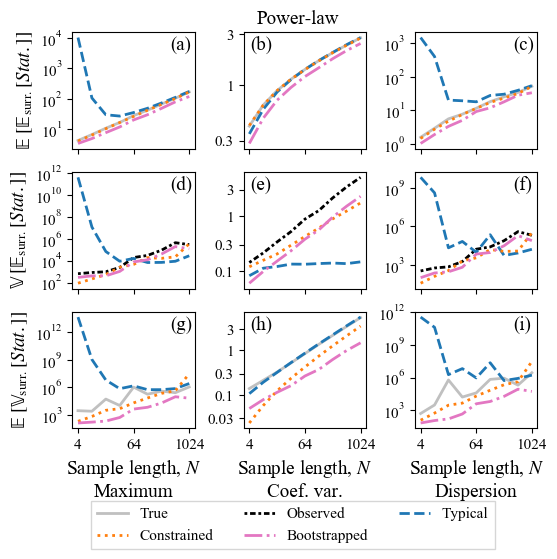

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [15]:
# Make Fig. S3
#
import numpy.matlib

to_plot = [0, 3, 1, 2, 4]
num_to_plot = len(to_plot)

surr_name_list = ['True', 'Typical', 'Constrained', 'Observed', 'Bootstrapped']

num_tests = 10000;

stat_name_str_list = ['max_deg', 'coef_var', 'vmr']
stat_label_str_list = ['Maximum', 'Coef. var.', 'Dispersion']
yy_tick_list_list_list = [[[10**n for n in range(-20, 20)], [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000], [10**n for n in range(-10, 10)]],\
                          [[10**n for n in range(-18, 18, 2)], [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000], [10**n for n in range(-18, 18, 3)]],\
                          [[10**n for n in range(-18, 18, 3)], [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000], [10**n for n in range(-18, 18, 3)]]]


num_stat = len(stat_name_str_list)
x_min = 1

num_surr = 100

this_gamma = 2.5; gamma_str = str(this_gamma).replace('.', '-')

file_name_str_parts =['stat-vals-' + str(num_tests) + '-tests-1gamma-' + gamma_str + '-' + gamma_str + '_x_min-' + str(x_min) + '_9N-4-1024_stat-', '_surr-type-', '_true-func-0_', 'surr_eff_rej_rates_test.npy']

to_plot_str = str(to_plot[0])
for ii in range(1, num_to_plot):
    to_plot_str = to_plot_str + '-' + str(to_plot[ii])

name_str = 'ee-ve-ev_supp_' + 'power-law_min-val-1_' + str(num_tests) + 'tests_' + str(num_surr) + 'surr_' + to_plot_str;

max_power_2_p_1 = 11;

NN = [2**n for n in range(2, max_power_2_p_1, 1)]

n_cols = len(stat_name_str_list);
n_rows = 3

fig, ax = plt.subplots(n_rows, n_cols, sharex='col', sharey='none', figsize=(6, 4.5))

lett_rel_pos_x = 0.80;
lett_rel_pos_y = 0.85;

l_list = []
for kk in range(n_rows):
    for jj in range(n_cols):
        stat_name_str = stat_name_str_list[jj]
        file_name_str = file_name_str_parts[0] + stat_name_str + file_name_str_parts[1] + str(0) + file_name_str_parts[2] + str(num_surr) + file_name_str_parts[3]
        ax_subplot = ax[kk][jj]
        for ii in range(num_to_plot):
            surr_code = to_plot[ii]
            surr_name = surr_name_list[surr_code]
            style = style_dict[surr_name]
            file_name_str = file_name_str_parts[0] + stat_name_str + file_name_str_parts[1] + str(surr_code) + file_name_str_parts[2] + str(num_surr) + file_name_str_parts[3]
            if (kk == 0):
                zz = np.load(results_folder_name + '/' + 'mean_' + file_name_str)
                yy = zz[0]
                yy = np.mean(yy, axis=1)
                if (surr_code == 3):
                    yy = np.nan*yy
            elif (kk == 1):
                zz = np.load(results_folder_name + '/' + 'mean_' + file_name_str)
                yy = zz[0]
                yy_mean_0 = np.mean(yy, axis=1).reshape(len(NN), 1)
                yy_mean = np.matlib.repmat(yy_mean_0, 1, num_tests)
                yy2 = (yy - yy_mean)**2
                yy = np.sum(yy2, axis=1)/(num_tests - 1)
                if (surr_code == 0):
                    yy = np.nan*yy
            elif (kk == 2):
                zz = np.load(results_folder_name + '/' + 'std_' + file_name_str)
                yy = zz[0]
                yy = yy**2
                yy = np.mean(yy, axis=1)
                if (surr_code == 3):
                    yy = np.nan*yy
            l_ii = ax_subplot.errorbar(NN, yy, linestyle=style[1], color=style[0])
            l_list = l_list + [l_ii]
        ax_subplot.set_xscale('log')
        ax_subplot.set_yscale('log')
        y_lim = ax_subplot.get_ylim()
        yy_tick_list = yy_tick_list_list_list[kk][jj]
        yy_tick_label_list = [str(y_t) for y_t in yy_tick_list]
        ax_subplot.set_yticks(yy_tick_list)
        if (jj == 1):
            ax_subplot.set_yticklabels(yy_tick_label_list)
        ax_subplot.minorticks_off()
        if (kk == 2):
            ax[kk][jj].xaxis.set_label_text(r'Sample length, $N$' + '\n' + stat_label_str_list[jj])
        ax_subplot.set_ylim(y_lim)
    ax_subplot = ax[kk][0]
    if (kk == 0):
        y_label = r'${\rm\mathbb{E}}\ [ {\rm\mathbb{E}}_{\rm{surr.}} [ Stat. ] ]$'
    elif (kk == 1):
        y_label = r'${\rm\mathbb{V}}\ [ {\rm\mathbb{E}}_{\rm{surr.}} [ Stat. ] ]$'
    elif (kk == 2):
        y_label = r'${\rm\mathbb{E}}\ [ {\rm\mathbb{V}}_{\rm{surr.}} [ Stat. ] ]$'
    ax_subplot.yaxis.set_label_text(y_label)
    
for kk in range(n_rows):
    for jj in range(n_cols):
        ax_subplot = ax[kk][jj]    
        ax_subplot.set_xticks([4, 64, 1024])
        if (kk == 2):
            ax_subplot.set_xticklabels([str(4), str(64), str(1024)])
        else:
            ax_subplot.set_xticklabels(['','',''])

for kk in range(n_rows):
    for jj in range(n_cols):
        ax_subplot = ax[kk][jj]
        num = kk*n_cols + jj + 1
        if ('log' == ax_subplot.get_yscale()):
            if (jj == 1):
                place_letter_log_scale(ax_subplot, num, 0.05, lett_rel_pos_y, MEDIUM_SIZE)
            else:
                place_letter_log_scale(ax_subplot, num, lett_rel_pos_x, lett_rel_pos_y, MEDIUM_SIZE)
        else:
            place_letter_x_log_y_lin(ax_subplot, num, lett_rel_pos_x, lett_rel_pos_y, MEDIUM_SIZE)
        
# fig.suptitle(r'Power-law, ' + r'$x_{\rm{min}}$ = ' + str(x_min), fontsize=MEDIUM_SIZE, y=0.95)
fig.suptitle(r'Power-law', fontsize=MEDIUM_SIZE, y=0.93)

fig.subplots_adjust(bottom=0, wspace=0.4)
num_col = 3
ax[2][1].legend(handles = flip(l_list, num_col), labels = flip([surr_name_list[ii] for ii in to_plot], num_col), loc='upper center', bbox_to_anchor=(0.4, -0.56), fancybox=False, shadow=False, ncol=num_col)
plt.show()
fig.savefig(fig_folder_name + '/' + name_str + '.eps', bbox_inches='tight')
fig.savefig(fig_folder_name + '/' + name_str + '.png', bbox_inches='tight')
fig.savefig(fig_folder_name + '/' + name_str + '.pdf', bbox_inches='tight')

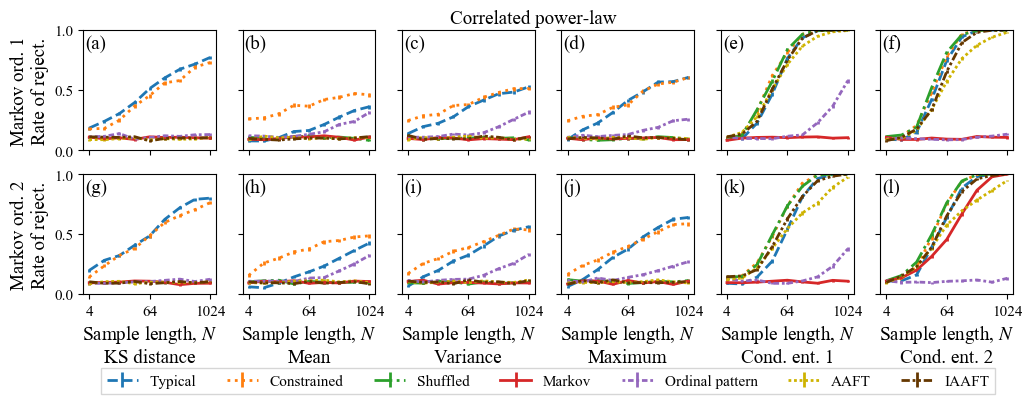

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [16]:
# Make Fig. S4
# 
min_deg_list = [1, 1]
min_N = 4; max_N = 1024; num_N = 1 + int(np.round(log(max_N/min_N, 2))); NN = [2**n for n in range(int(np.round(log(min_N, 2))), int(np.round(log(max_N, 2))) + 1, 1)]
stat_list = ['ks_dist', 'mean_de', 'var_deg', 'max_deg', 'con_e_1', 'co_en_o2']
stat_name_list = ['KS distance', 'Mean', 'Variance', 'Maximum', 'Cond. ent. 1', 'Cond. ent. 2']
surr_list = ['typic', 'const', 'shuff', 'mcconb3o1tr100000', 'conoplt16tr100000', 'aaft', 'iaaft']#'conoplt16tr100000'
surr_name_list = ['Typical', 'Constrained', 'Shuffled', r'Markov', 'Ordinal pattern', 'AAFT', 'IAAFT']
rej_type = 'pow'
rej_type_name = 'Rate of reject.'
distrib_list = ['c9r_pl_bin_3', 'c92_pl_bin_3']
distrib_name_list = ['Markov ord. 1', 'Markov ord. 2']
num_tests = 1000

n_stats = len(stat_name_list)

name_part_1 = '1gamma-2-5-2-5-2-5_x_min-'
name_part_2 = '_' + str(num_N) + 'N-' + str(min_N) + '-' + str(max_N) + '_stat-'
name_part_3 = '_surr-'
name_part_4 = '_rej-' + rej_type + '_'
name_part_5 = '_nom_size-0-1_9surr_' + str(num_tests) + 'tests_safe-1_dir_rej_rates_test.dat'


x_min_list = min_deg_list

lett_rel_pos_x = 0.0002;
lett_rel_pos_y = 0.85;

l_list = []
fig, ax = plt.subplots(len(min_deg_list), n_stats, sharex='col', sharey='row', figsize=(12, 3))
for hh in range(len(min_deg_list)):
    min_deg = min_deg_list[hh]
    distrib = distrib_list[hh]
    distrib_name = distrib_name_list[hh]
    name_str = r'Markov-power-law' + '_' + str(len(stat_list)) + 'stats' + '_nom-size-0-1_num-surr-9_num-tests_' + str(num_tests) + '_' + rej_type + '_min-val-' + str(min(min_deg_list)) + '-' + str(max(min_deg_list)) + '_' + str(len(surr_list)) + 'surr_' + str(num_N) + 'N' + str(min_N) + '-' + str(max_N)
    for jj in range(n_stats):
        stat = stat_list[jj]
        ax_subplot = ax[hh][jj]
        for ii in range(len(surr_list)):
            surr_name = surr_name_list[ii]
            style = style_dict[surr_name]
            surr = surr_list[ii]
            file_name_str = name_part_1 + str(min_deg) + name_part_2 + stat + name_part_3 + surr + name_part_4 + distrib + name_part_5
            try:
                zz = np.loadtxt(results_folder_name + '/' + file_name_str)
            except:
                print(file_name_str)
                zz = np.nan*zz
            yy = zz[:]
            if (ii == 2) and (jj <= 0):
                yy = np.nan*yy
            yy_err = np.sqrt(yy*(1-yy)/num_tests)
            l_ii = ax_subplot.errorbar(NN, yy, yy_err, linestyle=style[1], color=style[0])
            l_list = l_list + [l_ii]
            ax_subplot.set_xscale('log')
            ax_subplot.set_xticks([4, 64, 1024])
            ax_subplot.set_yticks([0, 0.5, 1])
        ax_subplot.set_ylim(0, 1)
        num = hh*n_stats + jj + 1
        place_letter(ax_subplot, num, lett_rel_pos_x, lett_rel_pos_y, MEDIUM_SIZE)
    ax_subplot = ax[hh][0]
    ax_subplot.yaxis.set_label_text(r'' + distrib_name_list[hh] + '\n' + rej_type_name)

for jj in range(n_stats):
    ax_subplot = ax[hh][jj]
    ax_subplot.set_xticklabels([str(4), str(64), str(1024)])
    ax_subplot.xaxis.set_label_text(r'Sample length, $N$' + '\n' + stat_name_list[jj])

fig.suptitle('Correlated power-law', fontsize=MEDIUM_SIZE, y=0.95)

fig.subplots_adjust(bottom=0, wspace=0.2)
num_col = 7
ax[hh][3].legend(handles = l_list, labels = surr_name_list, loc='upper center', bbox_to_anchor=(-0.1, -0.55), fancybox=False, shadow=False, ncol=num_col)

plt.show()

fig.savefig(fig_folder_name + '/' + name_str + '.eps', bbox_inches='tight')
fig.savefig(fig_folder_name + '/' + name_str + '.png', bbox_inches='tight')
fig.savefig(fig_folder_name + '/' + name_str + '.pdf', bbox_inches='tight')

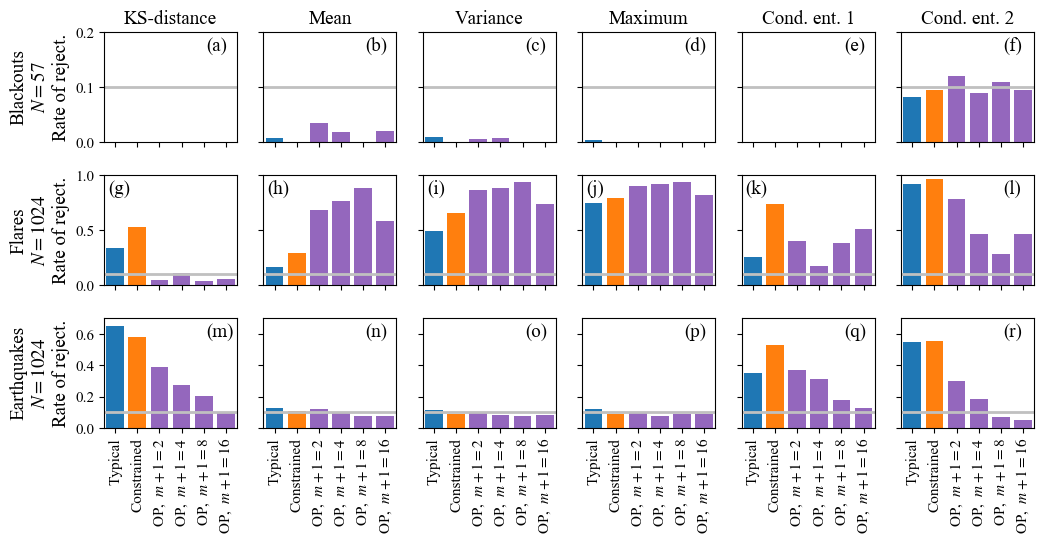

In [17]:
# Make Fig. S5
#
# min_N = 4; max_N = 1024; num_N = 1 + int(np.round(log(max_N/min_N, 2))); NN = [2**n for n in range(int(np.round(log(min_N, 2))), int(np.round(log(max_N, 2))) + 1, 1)]
stat_list = ['ks_dist', 'mean_de', 'var_deg', 'max_deg', 'con_e_1', 'co_en_o2']
stat_name_list = ['KS-distance', 'Mean', 'Variance', 'Maximum', 'Cond. ent. 1', 'Cond. ent. 2']
# stat = 'max_deg'; stat_name_list = 'Maximum'

num_stat_considered = len(stat_list)

# surr_list = ['typic', 'const', 'conoplt16tr100000']#, 'mcconb3o1tr100000']
# surr_name_list = ['Typical', 'Constrained', 'OP,  $m+1=16$',]# 'Markov, $m=1$']
# style_key_list = ['Typical', 'Constrained'] + 1*['Ordinal pattern']# + ['Markov']
# 
distrib_list = ['blackouts-tail', 'flares-normed', 'earthquakes']
distrib_name_list = ['Blackouts', 'Flares', 'Earthquakes']
name_str = 'flares-earthquakes-blackouts'

surr_list = ['typic', 'const', 'conoplt2tr100000', 'conoplt4tr100000', 'conoplt8tr100000', 'conoplt16tr100000']
surr_name_list = ['Typical', 'Constrained', 'OP,  $m+1=2$', 'OP,  $m+1=4$', 'OP,  $m+1=8$', 'OP,  $m+1=16$',]
style_key_list = ['Typical', 'Constrained'] + 4*['Ordinal pattern']

# distrib_list = ['flares-normed', 'earthquakes']
# distrib_name_list = ['Flares', 'Earthquakes']
# name_str = 'flares-earthquakes'

num_surr = len(surr_list)

nom_size = 0.1

rej_type = 'pow'
rej_type_name = 'Rate of reject.'

num_distrib = len(distrib_list)

num_tests = 1000

n_stats = len(stat_name_list)

name_part_1 = '1gamma-2-5-2-5-2-5_x_min-'
name_part_3 = '_surr-'
name_part_4 = '_rej-' + rej_type + '_'
name_part_5 = '_nom_size-0-1_9surr_' + str(num_tests) + 'tests_safe-1_dir_rej_rates_test.dat'
x_min_list = [235, 1, 1]

lett_rel_pos_x = 0.77;
lett_rel_pos_y = 0.83;

# NN_list = [[4, 8, 16, 32, 64, 128, 256, 512, 1024],\
#            [4, 8, 16, 32, 64, 128, 256, 512, 1024],\
#            [4, 6, 8, 11, 15, 21, 29, 41, 57]]
# ind_N = 8

NN_list = [[57],\
           [1024],\
           [1024],\
          ]
ind_N = 0

fig, ax = plt.subplots(num_distrib, num_stat_considered, sharex='col', sharey='row', figsize=(2*num_stat_considered, 1.5*num_distrib))

for jj in range(num_distrib):
    distrib = distrib_list[jj]
    distrib_name = distrib_name_list[jj]
    x_min = x_min_list[jj]
    NN = NN_list[jj]
    num_N = len(NN)
    min_N = min(NN)
    max_N = max(NN)
    name_part_2 = '_' + str(num_N) + 'N-' + str(min_N) + '-' + str(max_N) + '_stat-'
    N = NN[ind_N]
    for kk in range(num_stat_considered):
        stat = stat_list[kk]
        stat_name = stat_name_list[kk]
        
        l_list = []
        y_list = []
        y_err_list = []
        col_list = []
        line_style_list = []
        for ii in range(num_surr):
            surr_name = surr_name_list[ii]
            surr = surr_list[ii]
            file_name_str = name_part_1 + str(x_min) + name_part_2 + stat + name_part_3 + surr + name_part_4 + distrib + name_part_5
            zz = np.loadtxt(results_folder_name + '/' + file_name_str)
            yy = zz#[:]
            y = yy#[ind_N]
            y_err = np.sqrt(y*(1-y)/num_tests)
            y_list = y_list + [y]
            y_err_list = y_err_list + [y_err]
            style_key = style_key_list[ii]
            style = style_dict[style_key]
            col_list = col_list + [style[0]]
            line_style_list = line_style_list + [style[1]]

        if (num_distrib > 1):
            ax_subplot = ax[jj][kk]
        else:
            ax_subplot = ax[kk]

        #bar_list = ax_subplot.bar(range(num_surr), y_list, yerr=y_err, color=col_list, linestyle='None')
        bar_list = ax_subplot.bar(range(num_surr), y_list, color=col_list, linestyle='None')
#         bar_list = ax_subplot.bar(range(num_surr), y_list, width=0.2, yerr=y_err, edgecolor=col_list, fill=False, linewidth=line_width)
#         for ii in range(num_surr):
#             line_style = line_style_list[ii]
#             bar_list[ii].set_linestyle(line_style)
        
#         #For examining rates of rejection:
#         for i, r in enumerate(y_list):
#             ax_subplot.text(i - 0.5, r + 0.01, str(r))
        
        xx = [-0.5, num_surr - 0.5]
        yy = np.array([nom_size, nom_size])
        yy_err = np.sqrt(yy*(1-yy)/num_tests)
        #ax_subplot.errorbar(xx, yy, yy_err, linestyle='-', color='silver', elinewidth=200, capsize=0, linewidth=0.1*line_width)
        ax_subplot.errorbar(xx, yy, linestyle='-', color='silver', linewidth=line_width)
        
        ax_subplot.set_xticks(range(num_surr))
        ax_subplot.set_xticklabels(surr_name_list, rotation=90, fontsize=SMALL_SIZE)
        
        if (kk == 0):
            ax_subplot.yaxis.set_label_text(distrib_name + '\n' +  r'$N = ' + str(N) + '$' + '\n' + rej_type_name)

        if (jj == 0):
            ax_subplot.set_yticks([0, 0.1, 0.2])
            ax_subplot.set_ylim(0, 0.2)
        if (jj == 1):
            ax_subplot.set_yticks([0, 0.5, 1])
            ax_subplot.set_ylim(0, 1)
        if (jj == 2):
            ax_subplot.set_yticks([0, 0.2, 0.4, 0.6])
            ax_subplot.set_ylim(0, 0.7)
            
        ax_subplot.set_xlim(-0.5, num_surr - 0.5)
            
        if (jj == 0):
            ax_subplot.set_title(stat_name, fontsize=MEDIUM_SIZE, y=1.00)
        
        num = jj*num_stat_considered + kk + 1
        if (jj == 1) and (kk <= 4):
            place_letter(ax_subplot, num, 0.03, lett_rel_pos_y, MEDIUM_SIZE)
        else:
            place_letter(ax_subplot, num, lett_rel_pos_x, lett_rel_pos_y, MEDIUM_SIZE)

fig.subplots_adjust(bottom=0, hspace=0.3)

plt.show()

fig.savefig(fig_folder_name + '/' + name_str + '.eps', bbox_inches='tight')
fig.savefig(fig_folder_name + '/' + name_str + '.png', bbox_inches='tight')
fig.savefig(fig_folder_name + '/' + name_str + '.pdf', bbox_inches='tight')

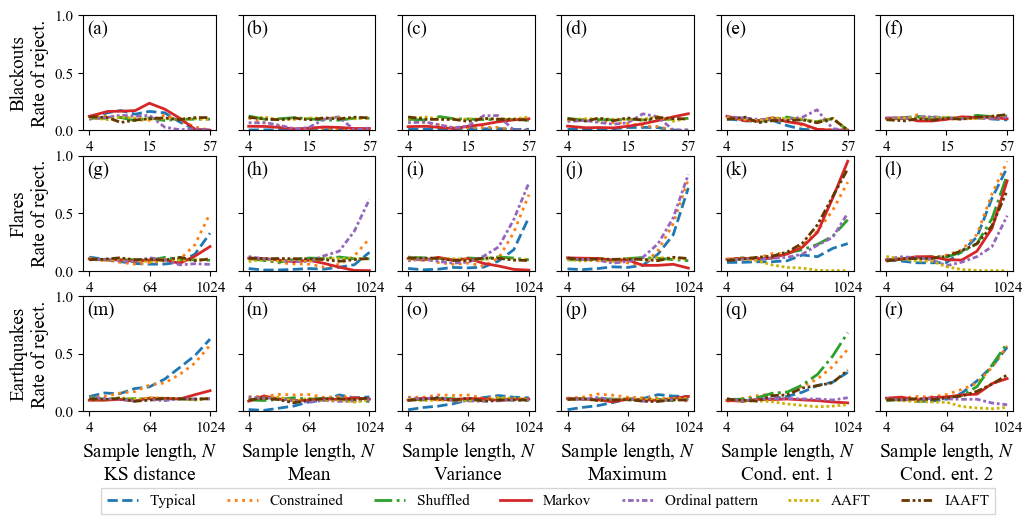

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [18]:
# Make Fig. S6:
# 
num_N = 9;
distrib_list = ['blackouts-tail', 'flares-normed', 'earthquakes', 'wars-tail']
y_label_list = ['Blackouts', 'Flares', 'Earthquakes', 'Wars']
N_list_list = [[4, 57], [4, 1024], [4, 1024], [4, 318]]
min_val_list = [235, 1, 1]#, 2]
num_min_val = len(min_val_list)

gamma_str_list = ['2-5', '2-5', '2-5', '2-5']
stat_list = ['ks_dist', 'mean_de', 'var_deg', 'max_deg', 'con_e_1', 'co_en_o2']
stat_name_list = ['KS distance', 'Mean', 'Variance', 'Maximum', 'Cond. ent. 1', 'Cond. ent. 2']
surr_list = ['typic', 'const', 'shuff', 'mcconb3o1tr100000', 'conoplt16tr100000', 'aaft', 'iaaft']
surr_name_list = ['Typical', 'Constrained', 'Shuffled', 'Markov', r'Ordinal pattern', 'AAFT', 'IAAFT']
rej_type_list = ['pow', 'pow', 'pow', 'pow']
rej_type_name_list = ['Rate of reject.', 'Rate of reject.', 'Rate of reject.', 'Rate of reject.']

# num_tests = 100; n_surr = 99
num_tests = 1000; n_surr = 9

n_stats = len(stat_name_list)

name_part_3 = '_surr-'
name_part_4 = '_rej-'
name_part_4_5 = '_'
name_part_5 = '_nom_size-0-1_' + str(n_surr) + 'surr_' + str(num_tests) + 'tests_safe-1_dir_rej_rates_test.dat'

name_str = 'flares_earthquakes_blackouts_with_aaft_iaaft' + '_' + str(len(stat_list)) + 'stats' + '_nom-size-0-1_num-surr-' + str(n_surr) + '_num-tests_' + str(num_tests) + '_min-deg-' + str(min(min_val_list)) + '-' + str(min(min_val_list)) + '_' + str(len(surr_list))

fig, ax = plt.subplots(num_min_val, n_stats, sharex='none', sharey='row', figsize=(12, 1.5*num_min_val))

lett_rel_pos_x = 0.03;
lett_rel_pos_y = 0.84;

l_list = []
for kk in range(num_min_val):
    gamma_str = gamma_str_list[kk]
    name_part_1 = '1gamma-' + gamma_str + '-' + gamma_str + '-' + gamma_str + '_x_min-'
    min_val = min_val_list[kk]
    distrib = distrib_list[kk]
    N_list = N_list_list[kk]
    rej_type = rej_type_list[kk]
    rej_type_name = rej_type_name_list[kk]
    min_N = N_list[0]
    max_N = N_list[1]
    ind_NList = 2 + np.arange(0, num_N, 1)*(np.log2(max_N) - 2)/(num_N - 1)
    NN = [int(np.round(2**n)) for n in ind_NList]
    name_part_2 = '_' + str(num_N) + 'N-' + str(min_N) + '-' + str(max_N) + '_stat-'
    for jj in range(n_stats):
        stat = stat_list[jj]
        ax_subplot = ax[kk][jj]
        for ii in range(len(surr_list)):
            surr_name = surr_name_list[ii]
            style = style_dict[surr_name]
            surr = surr_list[ii]
            file_name_str = name_part_1 + str(min_val) + name_part_2 + stat + name_part_3 + surr + name_part_4 + rej_type + name_part_4_5 + distrib + name_part_5
            try:
                zz = np.loadtxt(results_folder_name + '/' + file_name_str)
            except:
                print(file_name_str + ' not present.')
                zz = np.nan*zz
            yy = zz[:]
            yy_err = np.sqrt(yy*(1-yy)/num_tests)
            l_ii = ax_subplot.errorbar(NN, yy, linestyle=style[1], color=style[0])
            l_list = l_list + [l_ii]
            ax_subplot.set_xscale('log')
            x_tick_list = [NN[0], NN[int(np.round(0.5*(num_N - 1)))], NN[num_N - 1]]
            ax_subplot.set_xticks(x_tick_list)
            ax_subplot.set_xticklabels([str(x_tick) for x_tick in x_tick_list])
            if (rej_type == 'siz'):
                ax_subplot.set_yticks([0, 0.1, 0.2])
                ax_subplot.set_ylim(0, 0.2)
            else:
                ax_subplot.set_yticks([0, 0.5, 1])
                ax_subplot.set_ylim(0, 1)
        num = kk*n_stats + jj + 1
        place_letter_x_log_y_lin(ax_subplot, num, lett_rel_pos_x, lett_rel_pos_y, MEDIUM_SIZE)
        ax_subplot.minorticks_off()
    ax_subplot = ax[kk][0]
    ax_subplot.yaxis.set_label_text(y_label_list[kk] + '\n' + rej_type_name)

for jj in range(n_stats):
    ax[len(min_val_list) - 1][jj].xaxis.set_label_text(r'Sample length, $N$' + '\n' + stat_name_list[jj])

fig.subplots_adjust(bottom=0, wspace=0.2, hspace=0.22)
num_col = 7
ax[kk][2].legend(handles = l_list, labels = surr_name_list, loc='upper center', bbox_to_anchor=(1.10, -0.60), fancybox=False, shadow=False, ncol=num_col)

plt.show()
fig.savefig(fig_folder_name + '/' + name_str + '.eps', bbox_inches='tight')
fig.savefig(fig_folder_name + '/' + name_str + '.png', bbox_inches='tight')
fig.savefig(fig_folder_name + '/' + name_str + '.pdf', bbox_inches='tight')

Total time： 63318.954088599945sec.


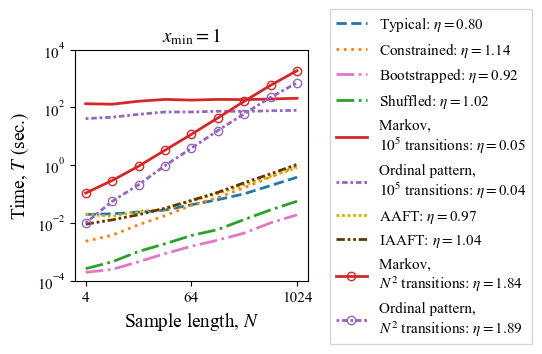

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [19]:
# Make Fig. S7:
# 
num_surr_types = 11

n_trial = 10
n_realis = 100

save_name_list = ['time_9N-4-1024_gamma-2.5_x-min-1_' + str(num_surr_types) + 'surr-types_' + str(n_trial) + 'trials_' + str(n_realis) + 'realis_b-3_L-16_tran-100000.json']

save_name_list_2 = ['time_9N-4-1024_gamma-2.5_x-min-1_' + str(num_surr_types) + 'surr-types_' + str(n_trial) + 'trials_' + str(n_realis) + 'realis_b-3_L-16_tran-N^2.json']

num_save_name = len(save_name_list)

surr_types_to_cons = [2, 3, 4, 5, 6, 8, 9, 10]
surr_types_to_cons_2 = [6, 8]

fig, ax = plt.subplots(1, num_save_name, sharex='row', sharey='row', figsize=(num_save_name*3, 3))

lett_rel_pos_x = 0.88
lett_rel_pos_y = 0.05

l_list = []

surr_meth_to_cons_name_list = []

N_min = 64
a_list_list = []
b_list_list = []

for k in range(num_save_name):
    save_name = save_name_list[k]
    
    [NN, scale_exp, x_min, seq, num_surr, num_trials, b, L, num_trans, surr_method_list, surr_method_name_list, time_list_list, save_name] = json.loads(codecs.open(results_folder_name + '/' + save_name, 'r', encoding='utf-8').read())
    
    time_array = np.array(time_list_list)
    
    if (num_save_name > 1):
        ax_subplot = ax[k]
    else:
        ax_subplot = ax
    
    a_list = []
    b_list = []
    
    for j in range(len(surr_types_to_cons)):
        i = surr_types_to_cons[j]
        surr_name = surr_method_name_list[i]
        if (surr_name == 'Markov 1'):
            surr_name = 'Markov'
        style = style_dict[surr_name]        
        if (surr_name == 'Markov'):
            surr_name = 'Markov, \n$10^5$ transitions: '
        elif (surr_name == 'Ordinal pattern'):
            surr_name = surr_name + ', \n$10^5$ transitions: '
        else:
            surr_name = surr_name + ': '
        time_list = time_array[:, i].tolist()
        l_ii = ax_subplot.errorbar(NN, [t/n_trial for t in time_list], linestyle=style[1], color=style[0])
        
        xx = [N for N in NN if (N >= N_min)]
        yy = [time_list[i]/n_trial for i in range(len(NN)) if (NN[i] >= N_min)]
        a, b = np.polyfit(np.log(xx), np.log(yy), 1)
        a_list = a_list + [a]
        b_list = b_list + [b]
        
        if (k == 0):
            l_list = l_list + [l_ii]
            surr_meth_to_cons_name_list = surr_meth_to_cons_name_list + [surr_name + "$\eta = $" +  "{:.2f}".format(a)]
        else:
            surr_meth_to_cons_name_list[j] = surr_meth_to_cons_name_list[j] + ", " +  "{:.2f}".format(a)
    
    save_name = save_name_list_2[k]
    
    [NN, scale_exp, x_min, seq, num_surr, num_trials, b, L, num_trans, surr_method_list, surr_method_name_list, time_list_list, save_name] = json.loads(codecs.open(results_folder_name + '/' + save_name, 'r', encoding='utf-8').read())
    
    time_array = np.array(time_list_list)
    
    for j in range(len(surr_types_to_cons_2)):
        i = surr_types_to_cons_2[j]
        surr_name = surr_method_name_list[i]
        if (surr_name == 'Markov 1'):
            surr_name = 'Markov'
        style = style_dict[surr_name]
        if (surr_name == 'Markov'):
            surr_name = 'Markov, \n$N^2$ transitions: '
        elif (surr_name == 'Ordinal pattern'):
            surr_name = surr_name + ', \n$N^2$ transitions: '
        else:
            surr_name = surr_name + ': '
        time_list = time_array[:, i].tolist()
        l_ii = ax_subplot.errorbar(NN, [t/n_trial for t in time_list], linestyle=style[1], color=style[0], marker='o', fillstyle='none')
        
        xx = [N for N in NN if (N >= N_min)]
        yy = [time_list[i]/n_trial for i in range(len(NN)) if (NN[i] >= N_min)]
        a, b = np.polyfit(np.log(xx), np.log(yy), 1)
        a_list = a_list + [a]
        b_list = b_list + [b]
        
        if (k == 0):
            l_list = l_list + [l_ii]
            surr_meth_to_cons_name_list = surr_meth_to_cons_name_list + [surr_name + "$\eta = $" +  "{:.2f}".format(a)]
        else:
            surr_meth_to_cons_name_list[j + len(surr_types_to_cons)] = surr_meth_to_cons_name_list[j + len(surr_types_to_cons)] + ", " +  "{:.2f}".format(a)
    
    time_array = np.array(time_list_list)

    a_list_list = a_list_list + [a_list]
    b_list_list = b_list_list + [b_list]
        
    #ax_subplot.set_ylabel('Prob. density')

    ax_subplot.set_xscale('log')
    ax_subplot.set_yscale('log')
    ax_subplot.set_xticks([4, 64, 1024])
    ax_subplot.set_xticklabels(['4', '64', '1024'])
    ax_subplot.minorticks_off()

    ax_subplot.set_xlabel('Sample length, $N$')
    ax_subplot.set_title(r'$x_{\rm{min}} = ' + str(x_min) + '$', fontsize=MEDIUM_SIZE)
    if (k == 0):
        ax_subplot.set_ylabel('Time, $T$ (sec.)')
    
    ax_subplot.set_yticks([10**n for n in range(-4, 5, 2)])
    ax_subplot.set_ylim([10**-4, 10**4])
    
    print('Total time： ' + str(np.sum(time_array)) + 'sec.')
    
    #place_letter_log_scale(ax_subplot, k + 1, lett_rel_pos_x, lett_rel_pos_y, MEDIUM_SIZE)
    
num_col = 1
ax_subplot.legend(handles = flip(l_list, num_col), labels = flip(surr_meth_to_cons_name_list, num_col), loc='center right', bbox_to_anchor=(2.0, 0.45), fancybox=False, shadow=False, ncol=num_col)

plt.show()

name_str = 'comp-time_min-val-1_' + str(n_realis) + 'surr_' + str(n_trial) + 'trials'

fig.savefig(fig_folder_name + '/' + name_str + '.png', bbox_inches='tight')
fig.savefig(fig_folder_name + '/' + name_str + '.eps', bbox_inches='tight')
fig.savefig(fig_folder_name + '/' + name_str + '.pdf', bbox_inches='tight')